# Exercise 6.2 Exploring Relationships

## 1. Importing libraries, setting system path, and importing data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set system path
path = r'C:\Users\Stony\OneDrive\CareerFoundry\Data Immersion Course\Achievement 6\Covid Analysis'

In [3]:
# Import dataset into df_covid_19 dataframe
df_covid_19 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Cleaned_Conditions_Contributing_to_COVID-19_Deaths.csv'))

In [4]:
# Validate data was loaded successfully
df_covid_19.head()

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,2023-09-24,2020-01-01,2020-01-31,2020.0,1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
1,2023-09-24,2020-02-01,2020-02-29,2020.0,2.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
2,2023-09-24,2020-03-01,2020-03-31,2020.0,3.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
3,2023-09-24,2020-04-01,2020-04-30,2020.0,4.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
4,2023-09-24,2020-05-01,2020-05-31,2020.0,5.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN


In [5]:
df_covid_19.shape

(430560, 13)

In [6]:
df_covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430560 entries, 0 to 430559
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          430560 non-null  object 
 1   Start Date          430560 non-null  object 
 2   End Date            430560 non-null  object 
 3   Year                430560 non-null  float64
 4   Month               430560 non-null  float64
 5   State               430560 non-null  object 
 6   Condition Group     430560 non-null  object 
 7   Condition           430560 non-null  object 
 8   ICD10_codes         430560 non-null  object 
 9   Age Group           430560 non-null  object 
 10  COVID-19 Deaths     430560 non-null  float64
 11  Number of Mentions  430560 non-null  float64
 12  Flag                150829 non-null  object 
dtypes: float64(4), object(9)
memory usage: 42.7+ MB


## 2. Identify variables for the visual exploratory analysis

Looking at the available columns in the dataset, the following variables will be looked at:
State, Condition, Condition Group, Age Group, Year, Month, Covid-19 Deaths, and Number of Mentions

## 3. Create a correlation matrix heatmap

In [7]:
# Create a subframe containing just the columns needed for ther analysis
selected_columns = ['Year', 'Month', 'State', 'Condition Group', 'Condition', 'Age Group', 'COVID-19 Deaths', 'Number of Mentions']
df_selected = df_covid_19[selected_columns]

State, Condition, Condition Group, and Age group are categorical and cannot be used as they are in any correlation analyses. They will need to be encoded to be used in this analysis.

In [8]:
# Encode the categorical columns so they can be used in our analysis
df_encoded = df_selected.copy()
df_encoded['State'] = df_encoded['State'].astype('category').cat.codes
df_encoded['Condition Group'] = df_encoded['Condition Group'].astype('category').cat.codes
df_encoded['Condition'] = df_encoded['Condition'].astype('category').cat.codes
df_encoded['Age Group'] = df_encoded['Age Group'].astype('category').cat.codes

In [9]:
# Validate the subframe was created successfully
df_encoded.shape

(430560, 8)

In [10]:
df_encoded.head()

,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths,Number of Mentions
0,2020.0,1.0,0,9,11,0,0.0,0.0
1,2020.0,2.0,0,9,11,0,0.0,0.0
2,2020.0,3.0,0,9,11,0,0.0,0.0
3,2020.0,4.0,0,9,11,0,0.0,0.0
4,2020.0,5.0,0,9,11,0,0.0,0.0


In [11]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430560 entries, 0 to 430559
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                430560 non-null  float64
 1   Month               430560 non-null  float64
 2   State               430560 non-null  int8   
 3   Condition Group     430560 non-null  int8   
 4   Condition           430560 non-null  int8   
 5   Age Group           430560 non-null  int8   
 6   COVID-19 Deaths     430560 non-null  float64
 7   Number of Mentions  430560 non-null  float64
dtypes: float64(4), int8(4)
memory usage: 14.8 MB


In [12]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()
print(corr_matrix)

                            Year         Month         State  Condition Group  \
Year                1.000000e+00 -1.322529e-01 -2.265890e-11     2.204744e-13   
Month              -1.322529e-01  1.000000e+00 -1.185940e-14     2.073373e-16   
State              -2.265890e-11 -1.185940e-14  1.000000e+00    -2.050765e-17   
Condition Group     2.204744e-13  2.073373e-16 -2.050765e-17     1.000000e+00   
Condition           7.042147e-14  1.997066e-17 -2.410199e-14     6.493454e-01   
Age Group          -2.103677e-14 -1.506794e-17  9.973261e-15    -2.222807e-21   
COVID-19 Deaths    -6.974118e-02  8.010619e-03 -1.455464e-02    -4.846116e-02   
Number of Mentions -6.922162e-02  7.961299e-03 -1.323241e-02    -6.449343e-02   

                       Condition     Age Group  COVID-19 Deaths  \
Year                7.042147e-14 -2.103677e-14        -0.069741   
Month               1.997066e-17 -1.506794e-17         0.008011   
State              -2.410199e-14  9.973261e-15        -0.014555   
Co

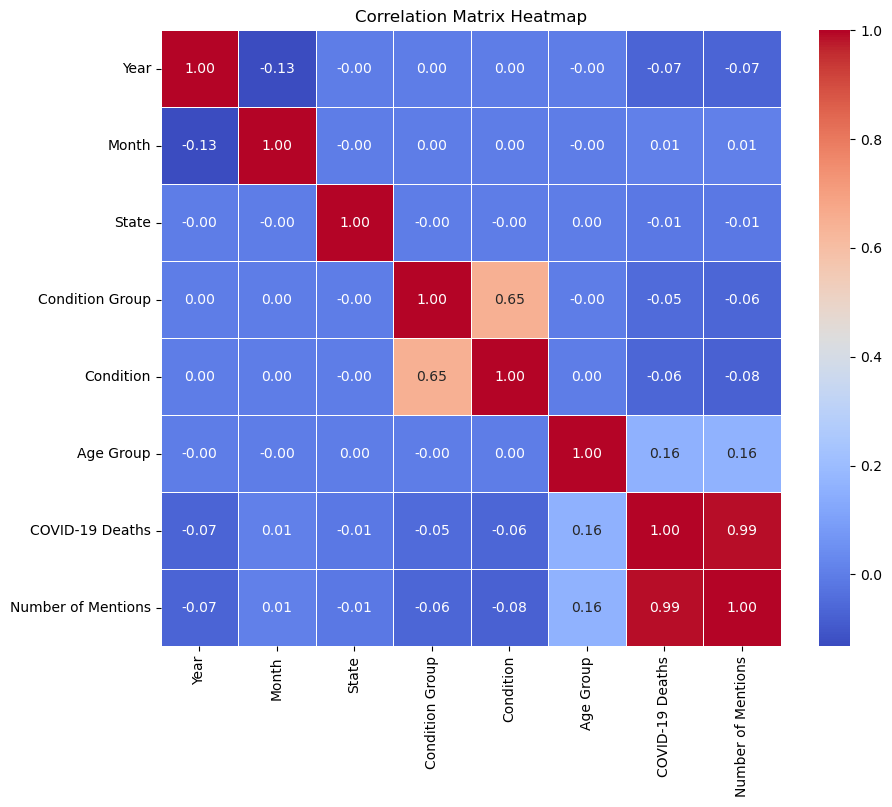

In [13]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
heatmap_corr_matrix = plt.gcf()
plt.show()

The top 5 positive correlations from the heatmap are:
COVID-19 Deaths and Number of Mentions
Condition and Condition Group
Age Group and Number of Mentions
Age Group and COVID-19 Deaths
Month and COVID-19 Deaths

The top 5 negative correlations from the heatmap are: Year and Month, Condition and Number of Mentions, Year and Number of Mentions, Year and COVID-19 Deaths, Condition Group and Number of Mentions

In [14]:
# Create a list of unique conditions
conditions = df_selected['Condition'].unique()

Correlation Matrix for Influenza and pneumonia:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.238490e-01  1.704905e-02 -2.945553e-02  2.238085e-01   
Number of Mentions -1.236896e-01  1.758262e-02 -2.841464e-02  2.246073e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.123849           -0.123690  
Month                      0.017049            0.017583  
State                     -0.029456           -0.028415  
Age Group                  0.223808            0.224607  
COVID-19 Deaths            1.000000            0.999618  
Number of Mentions         0.999618            1.000000 

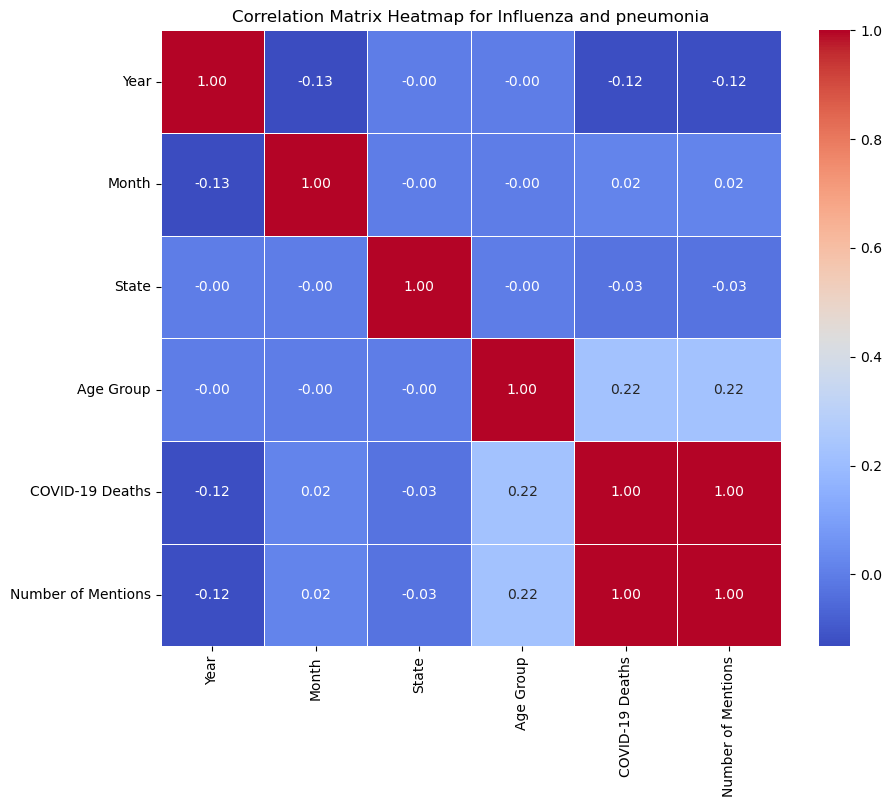

Correlation Matrix for Chronic lower respiratory diseases:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.012972e-01  1.823745e-02 -1.847260e-02  3.289086e-01   
Number of Mentions -1.008326e-01  1.765977e-02 -1.839541e-02  3.276535e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.101297           -0.100833  
Month                      0.018237            0.017660  
State                     -0.018473           -0.018395  
Age Group                  0.328909            0.327653  
COVID-19 Deaths            1.000000            0.990610  
Number of Mentions         0.990610          

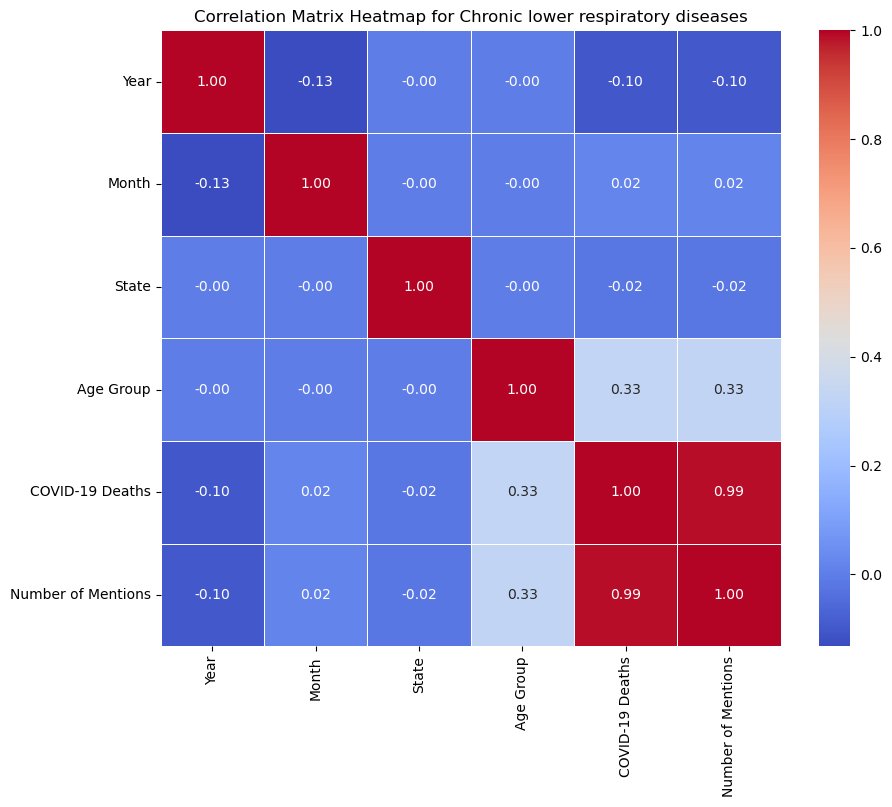

Correlation Matrix for Adult respiratory distress syndrome:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.647535e-01  1.804211e-02 -2.079589e-02  1.681900e-01   
Number of Mentions -1.643855e-01  1.827321e-02 -2.140477e-02  1.681765e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.164753           -0.164386  
Month                      0.018042            0.018273  
State                     -0.020796           -0.021405  
Age Group                  0.168190            0.168177  
COVID-19 Deaths            1.000000            0.993910  
Number of Mentions         0.993910         

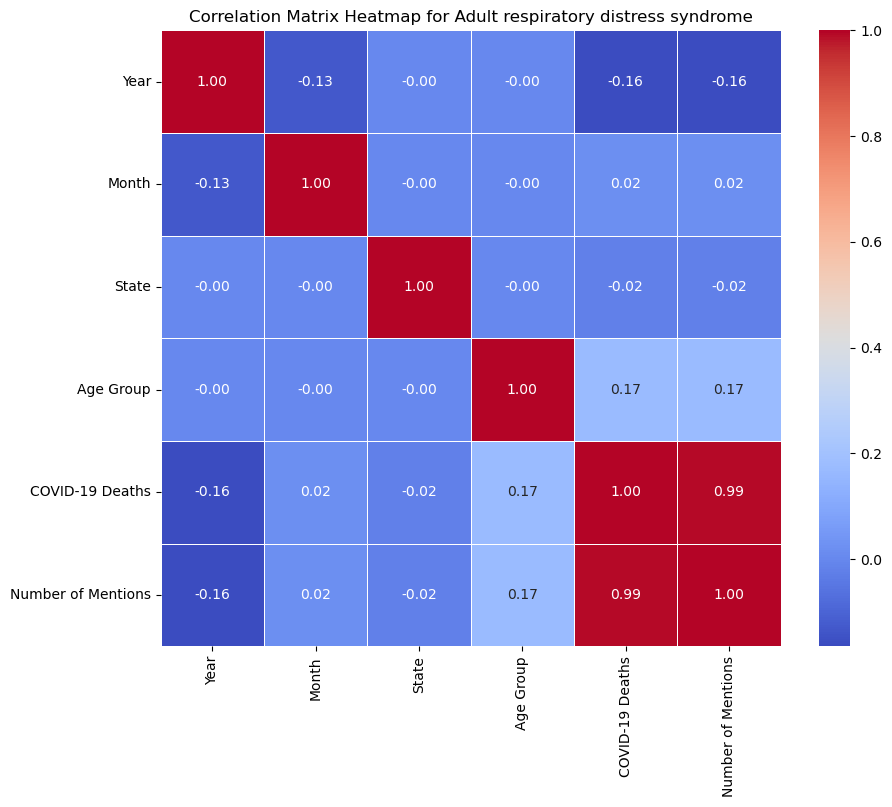

Correlation Matrix for Respiratory failure:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.201487e-01  1.635695e-02 -3.834360e-02  2.347157e-01   
Number of Mentions -1.193788e-01  1.612601e-02 -3.736759e-02  2.379465e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.120149           -0.119379  
Month                      0.016357            0.016126  
State                     -0.038344           -0.037368  
Age Group                  0.234716            0.237947  
COVID-19 Deaths            1.000000            0.999459  
Number of Mentions         0.999459            1.000000   



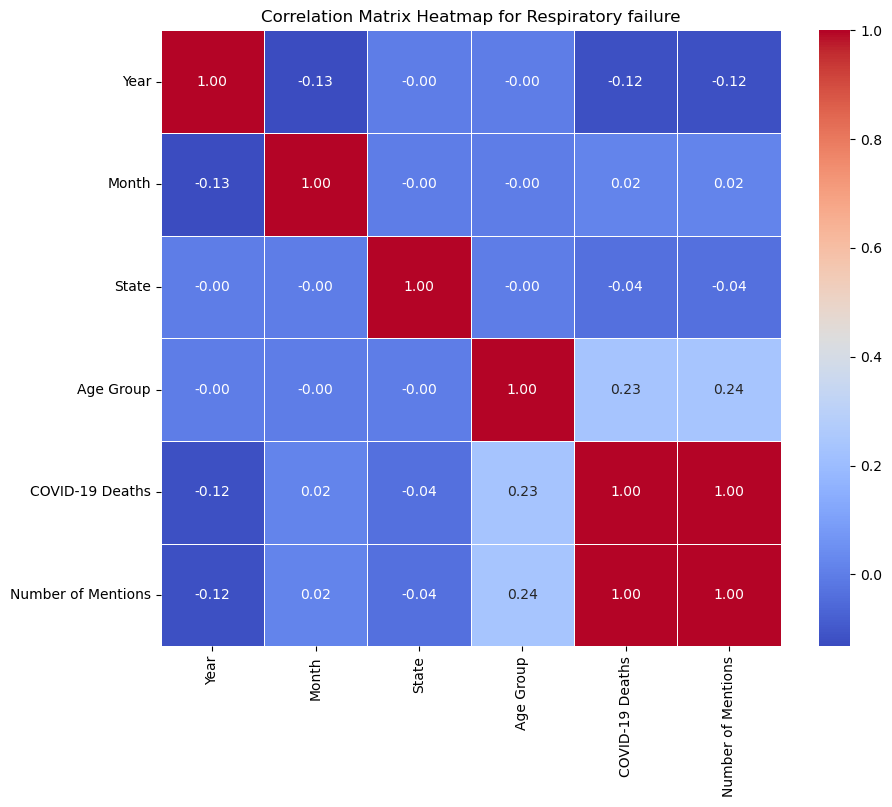

Correlation Matrix for Respiratory arrest:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.033627e-01  2.877045e-02 -6.856377e-02  2.702757e-01   
Number of Mentions -1.059462e-01  3.261866e-02 -6.922934e-02  2.718798e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.103363           -0.105946  
Month                      0.028770            0.032619  
State                     -0.068564           -0.069229  
Age Group                  0.270276            0.271880  
COVID-19 Deaths            1.000000            0.937781  
Number of Mentions         0.937781            1.000000   



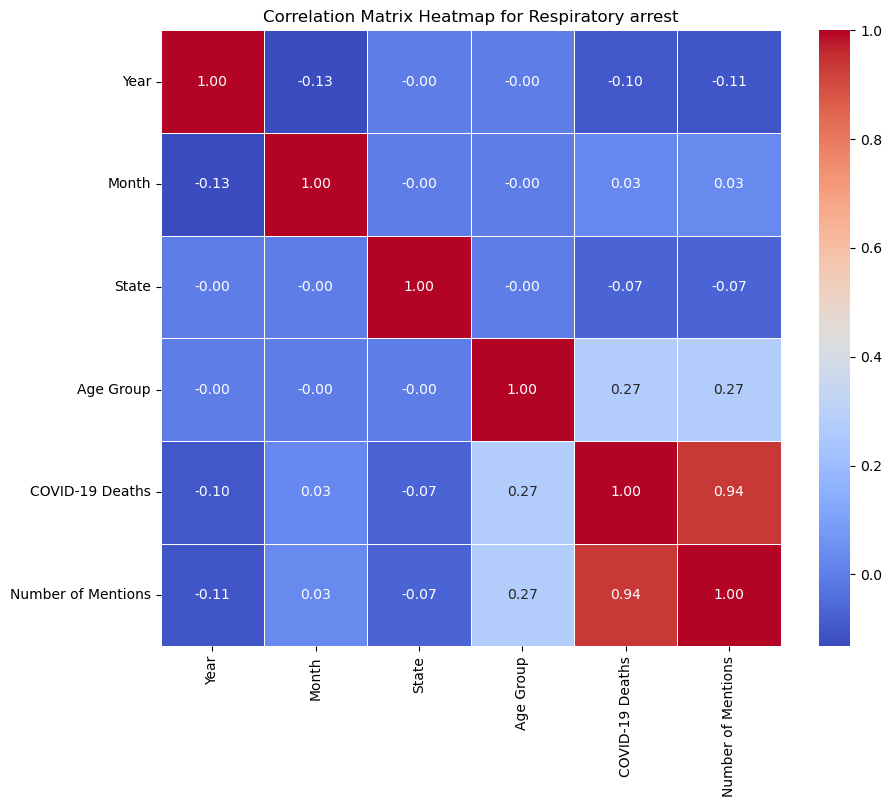

Correlation Matrix for Other diseases of the respiratory system:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -6.130278e-02  8.559522e-03 -1.733428e-02  3.122375e-01   
Number of Mentions -6.157812e-02  8.894443e-03 -1.908412e-02  3.062416e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.061303           -0.061578  
Month                      0.008560            0.008894  
State                     -0.017334           -0.019084  
Age Group                  0.312238            0.306242  
COVID-19 Deaths            1.000000            0.962704  
Number of Mentions         0.962704    

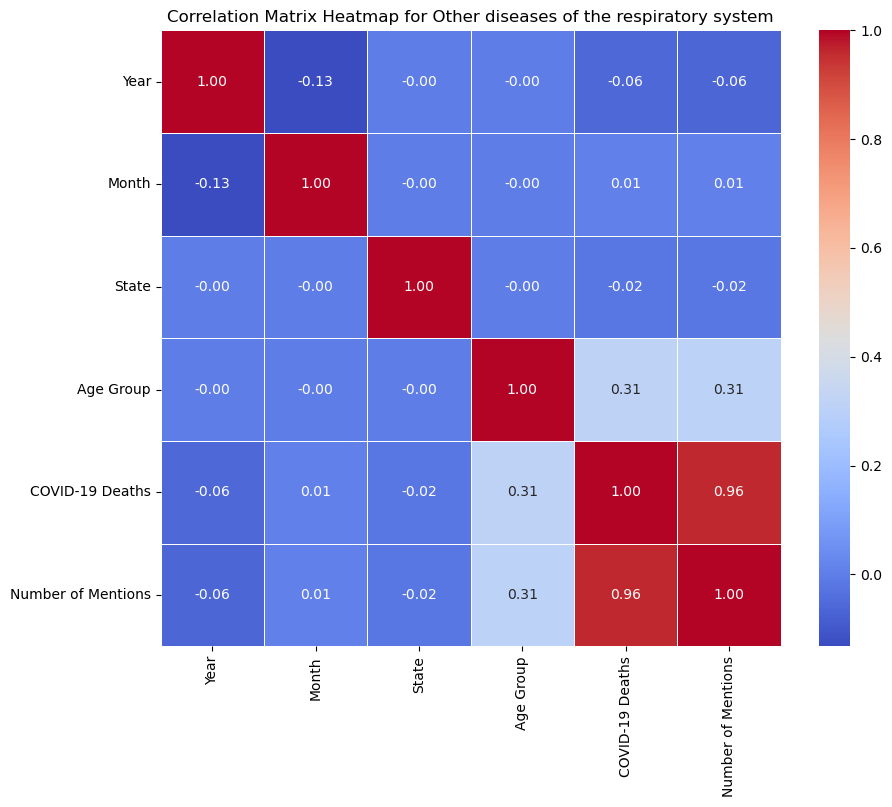

Correlation Matrix for Hypertensive diseases:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.147786e-01  6.367617e-03 -2.424849e-02  2.531222e-01   
Number of Mentions -1.136438e-01  6.309334e-03 -2.417264e-02  2.555814e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.114779           -0.113644  
Month                      0.006368            0.006309  
State                     -0.024248           -0.024173  
Age Group                  0.253122            0.255581  
COVID-19 Deaths            1.000000            0.998546  
Number of Mentions         0.998546            1.000000   

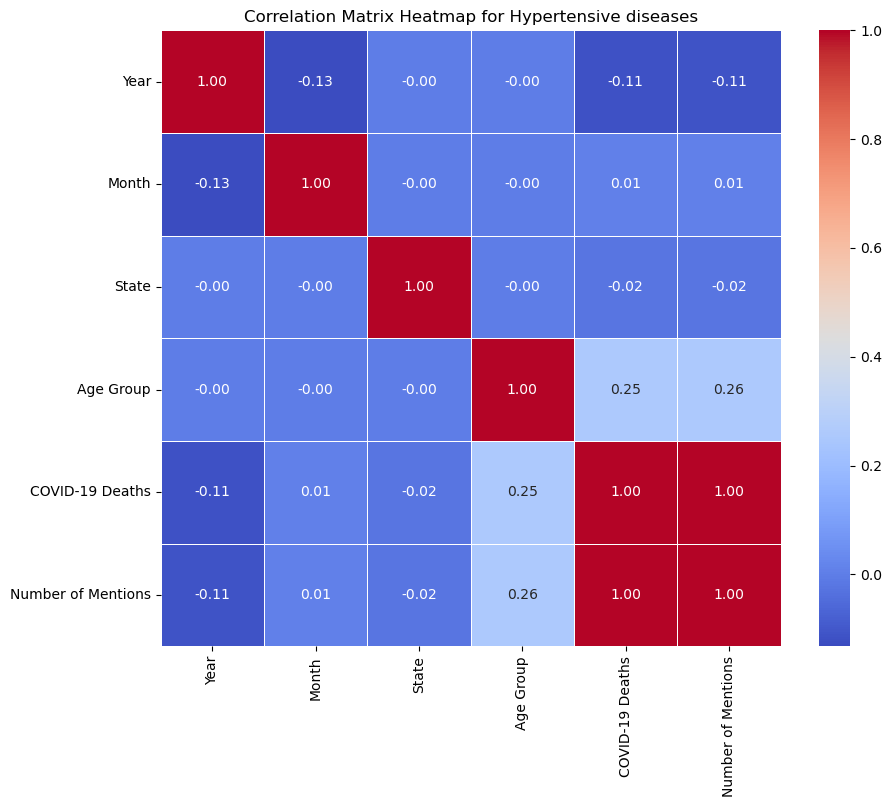

Correlation Matrix for Ischemic heart disease:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -9.901668e-02  1.154907e-02 -1.544892e-02  3.033524e-01   
Number of Mentions -9.831792e-02  1.100364e-02 -1.484907e-02  3.041498e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.099017           -0.098318  
Month                      0.011549            0.011004  
State                     -0.015449           -0.014849  
Age Group                  0.303352            0.304150  
COVID-19 Deaths            1.000000            0.995019  
Number of Mentions         0.995019            1.000000  

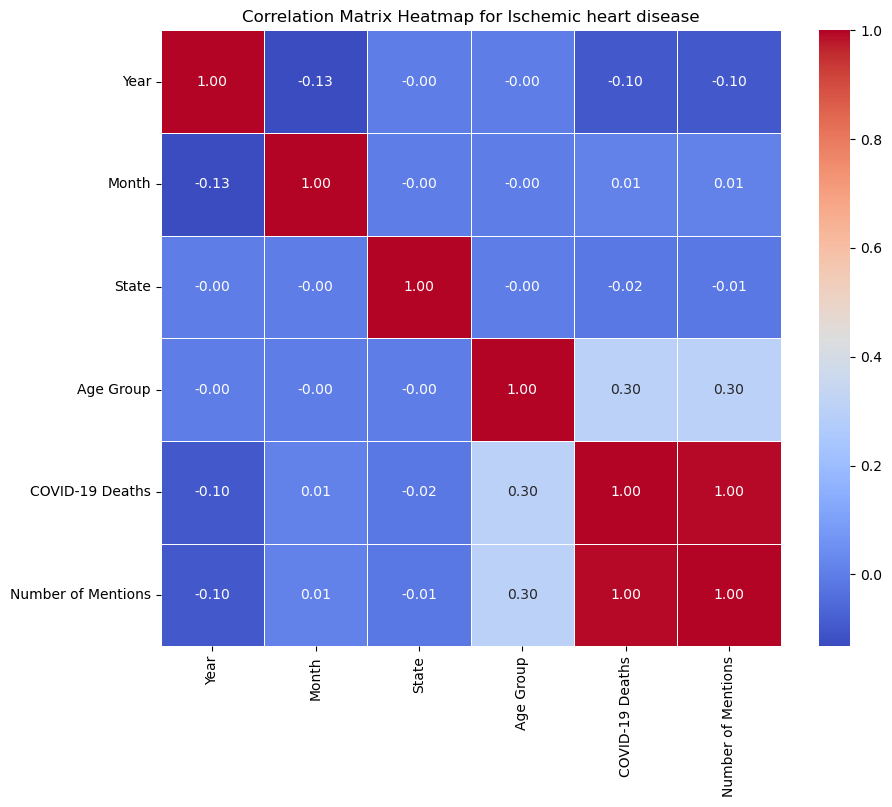

Correlation Matrix for Cardiac arrest:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -7.995019e-02 -8.964210e-03 -6.363653e-02  1.620705e-01   
Number of Mentions -7.911312e-02 -9.481728e-03 -6.337795e-02  1.627075e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.079950           -0.079113  
Month                     -0.008964           -0.009482  
State                     -0.063637           -0.063378  
Age Group                  0.162071            0.162708  
COVID-19 Deaths            1.000000            0.997823  
Number of Mentions         0.997823            1.000000   



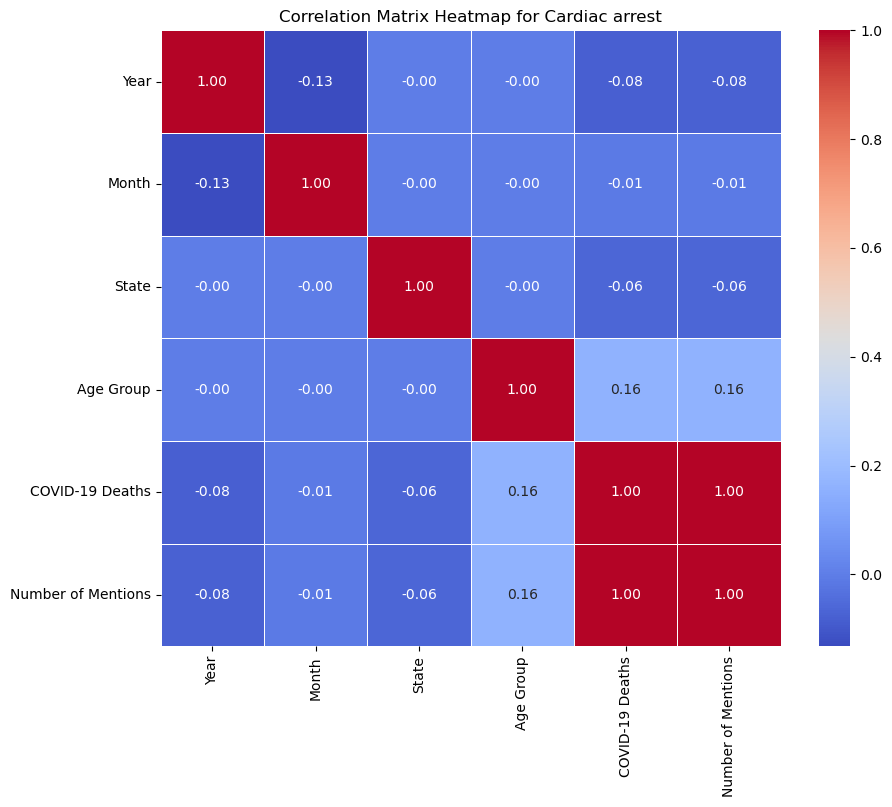

Correlation Matrix for Cardiac arrhythmia:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -8.133869e-02  1.233302e-02 -1.013341e-02  3.316744e-01   
Number of Mentions -8.018094e-02  1.260765e-02 -9.195049e-03  3.315003e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.081339           -0.080181  
Month                      0.012333            0.012608  
State                     -0.010133           -0.009195  
Age Group                  0.331674            0.331500  
COVID-19 Deaths            1.000000            0.991126  
Number of Mentions         0.991126            1.000000   



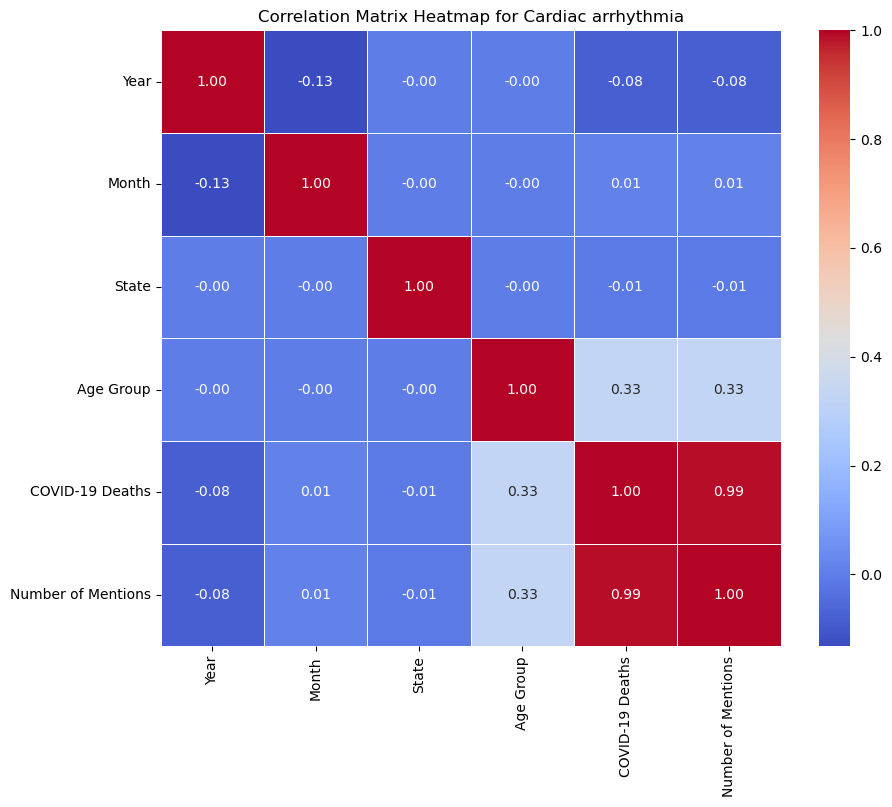

Correlation Matrix for Heart failure:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -7.656070e-02  8.466459e-03 -8.331488e-03  3.604080e-01   
Number of Mentions -7.433648e-02  7.525995e-03 -8.516109e-03  3.596142e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.076561           -0.074336  
Month                      0.008466            0.007526  
State                     -0.008331           -0.008516  
Age Group                  0.360408            0.359614  
COVID-19 Deaths            1.000000            0.990544  
Number of Mentions         0.990544            1.000000   



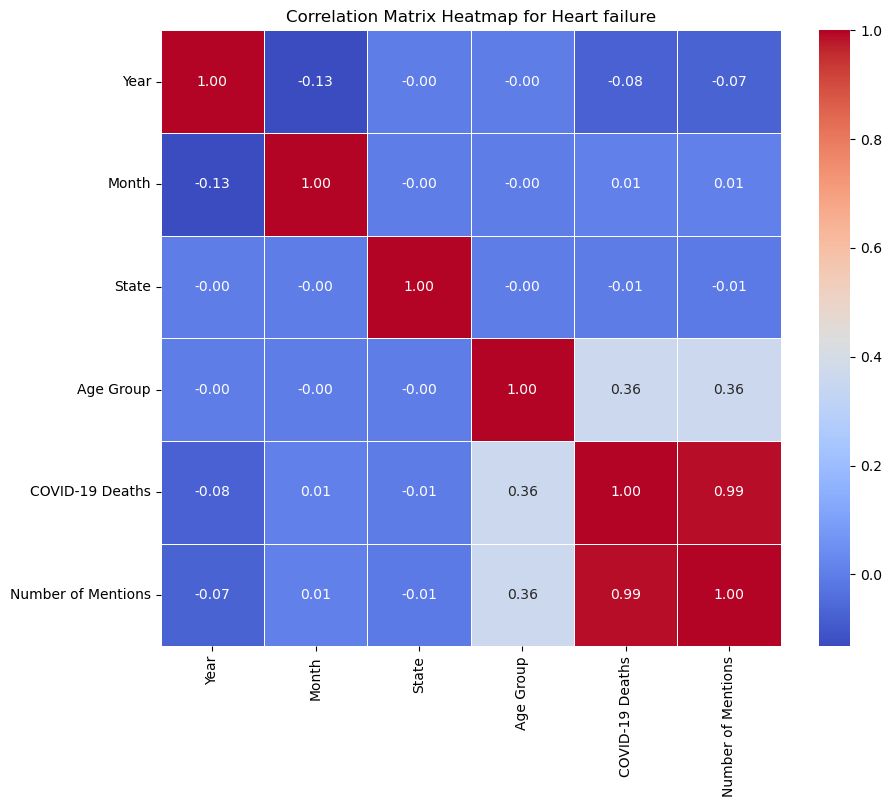

Correlation Matrix for Cerebrovascular diseases:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -8.719306e-02  7.102736e-03 -1.973300e-02  3.385565e-01   
Number of Mentions -8.668240e-02  7.503132e-03 -1.999043e-02  3.413629e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.087193           -0.086682  
Month                      0.007103            0.007503  
State                     -0.019733           -0.019990  
Age Group                  0.338557            0.341363  
COVID-19 Deaths            1.000000            0.974633  
Number of Mentions         0.974633            1.000000

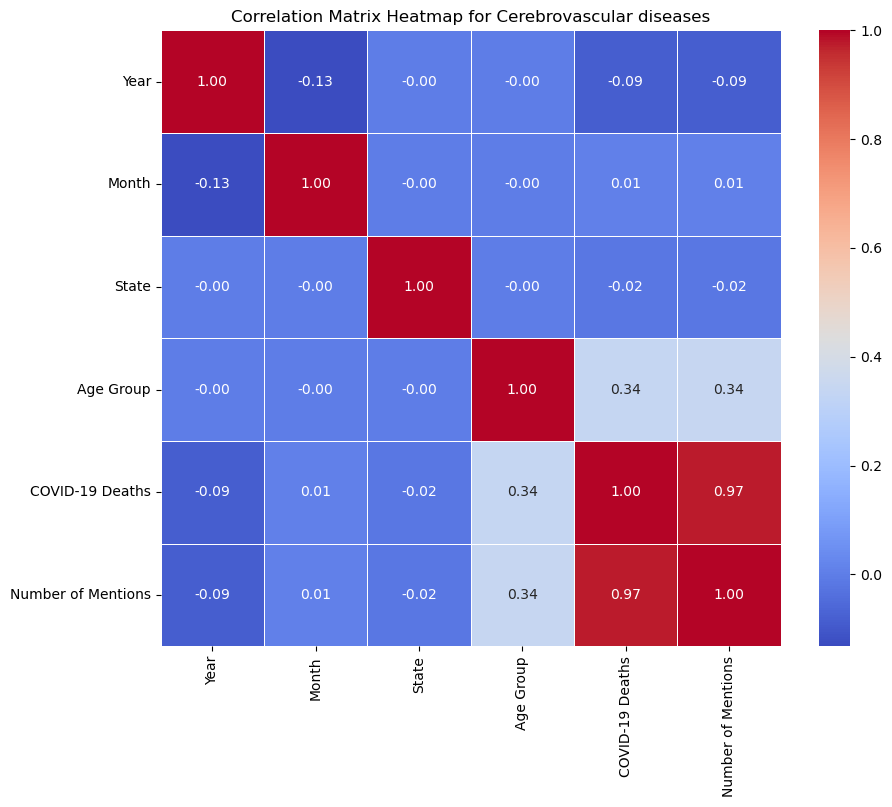

Correlation Matrix for Other diseases of the circulatory system:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -8.005683e-02  8.003228e-03 -1.459624e-02  3.046795e-01   
Number of Mentions -7.751191e-02  1.042266e-02 -1.329316e-02  3.073530e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.080057           -0.077512  
Month                      0.008003            0.010423  
State                     -0.014596           -0.013293  
Age Group                  0.304679            0.307353  
COVID-19 Deaths            1.000000            0.980895  
Number of Mentions         0.980895    

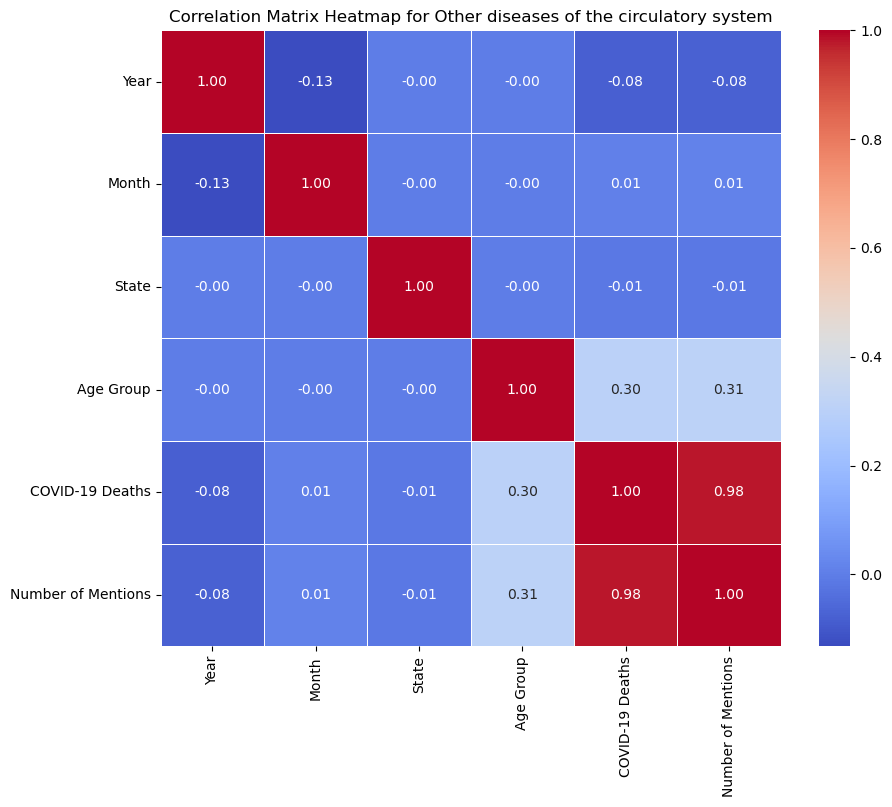

Correlation Matrix for Sepsis:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.014191e-01  8.259448e-03 -3.138550e-02  2.131875e-01   
Number of Mentions -1.018707e-01  9.491328e-03 -3.165314e-02  2.126709e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.101419           -0.101871  
Month                      0.008259            0.009491  
State                     -0.031385           -0.031653  
Age Group                  0.213187            0.212671  
COVID-19 Deaths            1.000000            0.993870  
Number of Mentions         0.993870            1.000000   



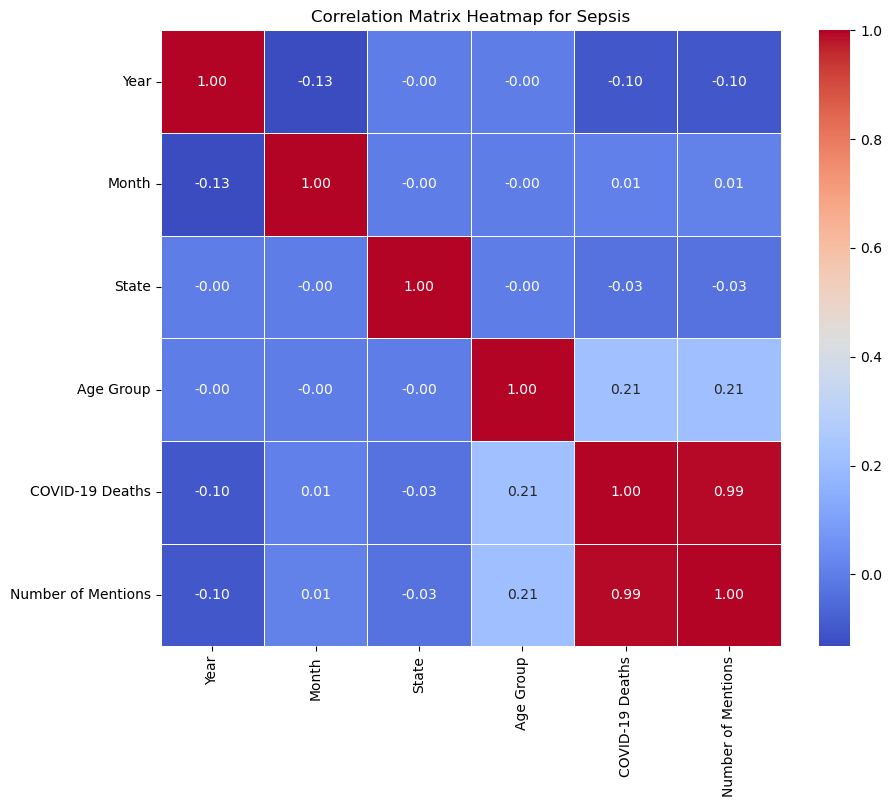

Correlation Matrix for Malignant neoplasms:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -3.575028e-02 -1.173835e-02 -2.124686e-02  3.458851e-01   
Number of Mentions -2.770560e-02 -1.132351e-02 -1.910922e-02  3.430120e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.035750           -0.027706  
Month                     -0.011738           -0.011324  
State                     -0.021247           -0.019109  
Age Group                  0.345885            0.343012  
COVID-19 Deaths            1.000000            0.970162  
Number of Mentions         0.970162            1.000000   



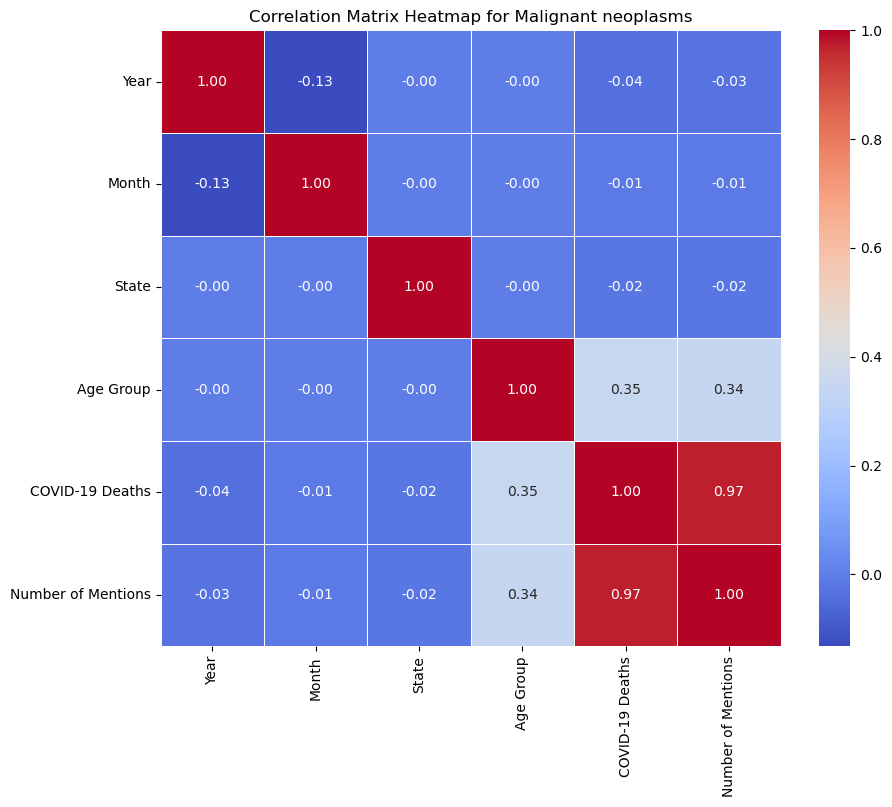

Correlation Matrix for Diabetes:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.249166e-01  1.318762e-02 -2.783058e-02  2.047433e-01   
Number of Mentions -1.247812e-01  1.309407e-02 -2.646612e-02  2.055639e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.124917           -0.124781  
Month                      0.013188            0.013094  
State                     -0.027831           -0.026466  
Age Group                  0.204743            0.205564  
COVID-19 Deaths            1.000000            0.997567  
Number of Mentions         0.997567            1.000000   



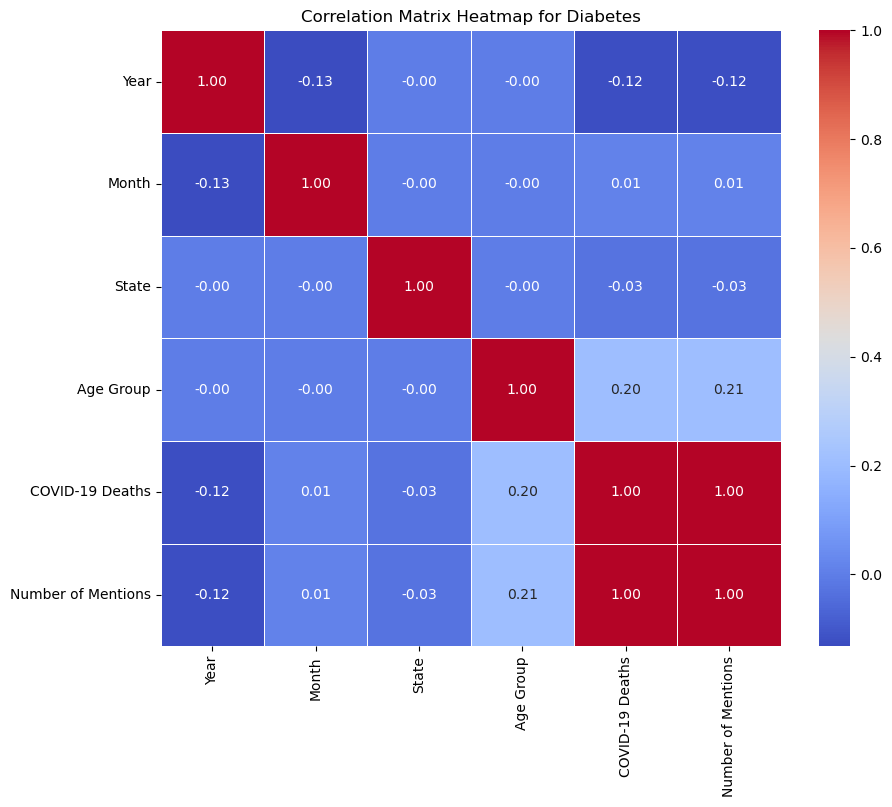

Correlation Matrix for Obesity:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.317266e-01  5.277212e-02 -1.010925e-02  6.732993e-02   
Number of Mentions -1.315474e-01  5.082250e-02 -1.040876e-02  6.673230e-02   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.131727           -0.131547  
Month                      0.052772            0.050823  
State                     -0.010109           -0.010409  
Age Group                  0.067330            0.066732  
COVID-19 Deaths            1.000000            0.972695  
Number of Mentions         0.972695            1.000000   



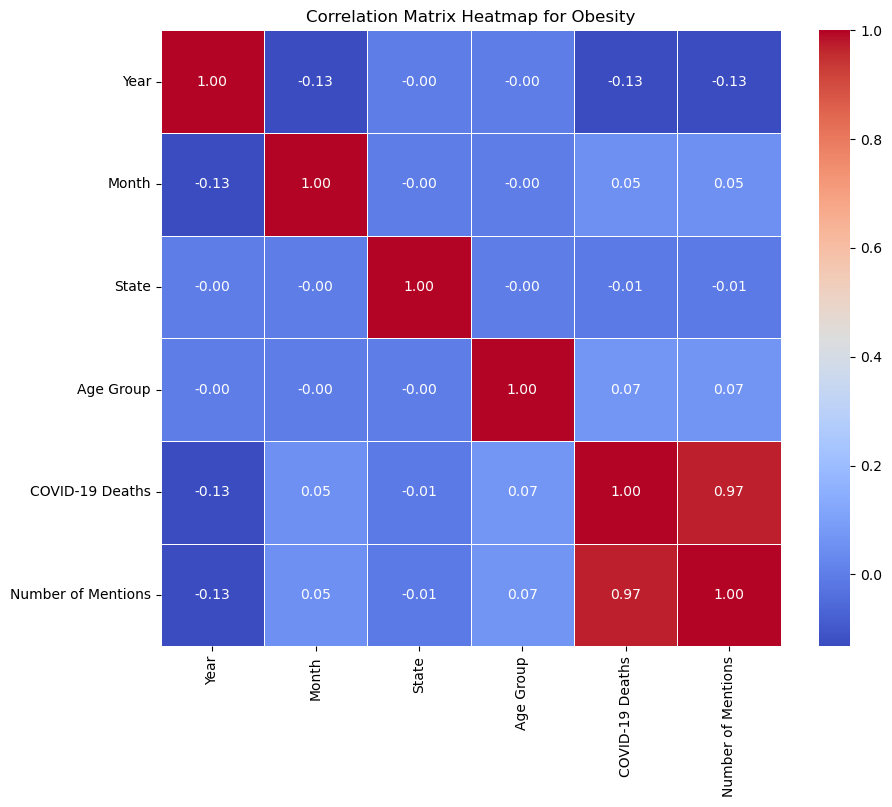

Correlation Matrix for Alzheimer disease:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -8.196883e-02  2.207795e-02 -9.288023e-03  3.118408e-01   
Number of Mentions -8.129382e-02  2.061112e-02 -9.494404e-03  3.082382e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.081969           -0.081294  
Month                      0.022078            0.020611  
State                     -0.009288           -0.009494  
Age Group                  0.311841            0.308238  
COVID-19 Deaths            1.000000            0.984362  
Number of Mentions         0.984362            1.000000   



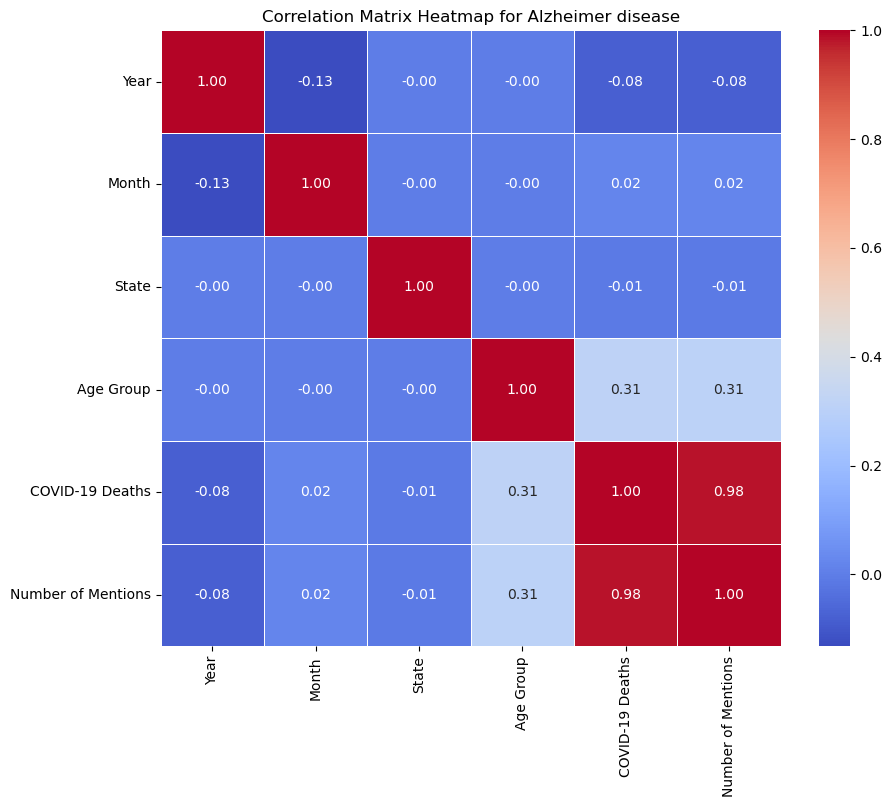

Correlation Matrix for Vascular and unspecified dementia:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.029579e-01  1.365985e-02 -6.624942e-03  3.037038e-01   
Number of Mentions -1.029286e-01  1.387420e-02 -6.307255e-03  3.034059e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.102958           -0.102929  
Month                      0.013660            0.013874  
State                     -0.006625           -0.006307  
Age Group                  0.303704            0.303406  
COVID-19 Deaths            1.000000            0.997167  
Number of Mentions         0.997167           

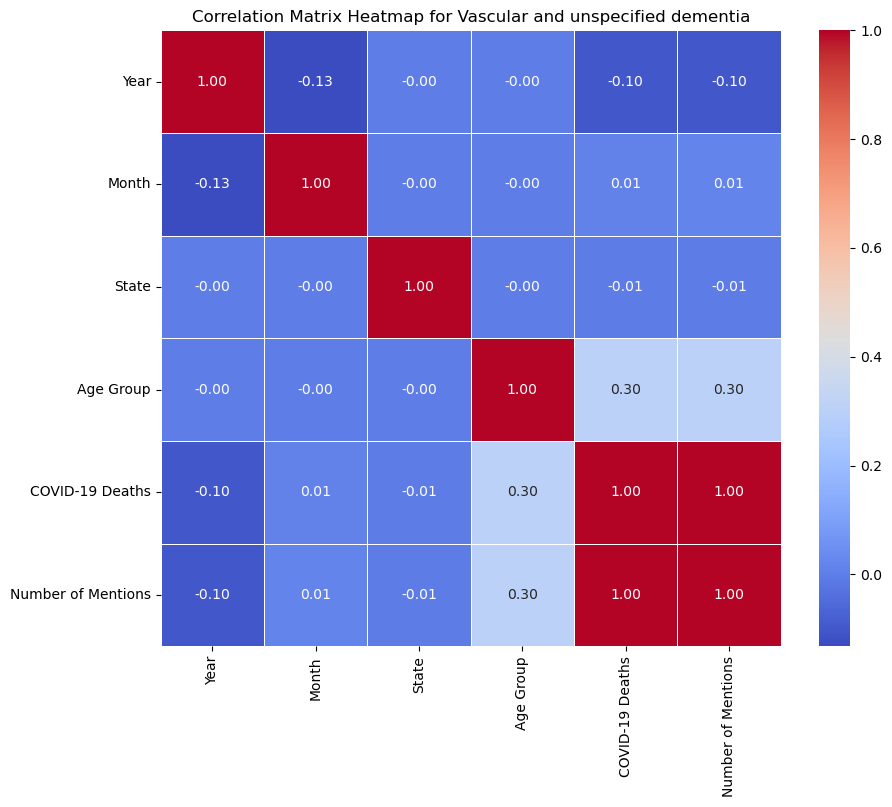

Correlation Matrix for Renal failure:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -9.141632e-02 -1.384678e-03 -1.161082e-02  2.437951e-01   
Number of Mentions -9.075285e-02 -1.865640e-03 -9.018829e-03  2.459728e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.091416           -0.090753  
Month                     -0.001385           -0.001866  
State                     -0.011611           -0.009019  
Age Group                  0.243795            0.245973  
COVID-19 Deaths            1.000000            0.994370  
Number of Mentions         0.994370            1.000000   



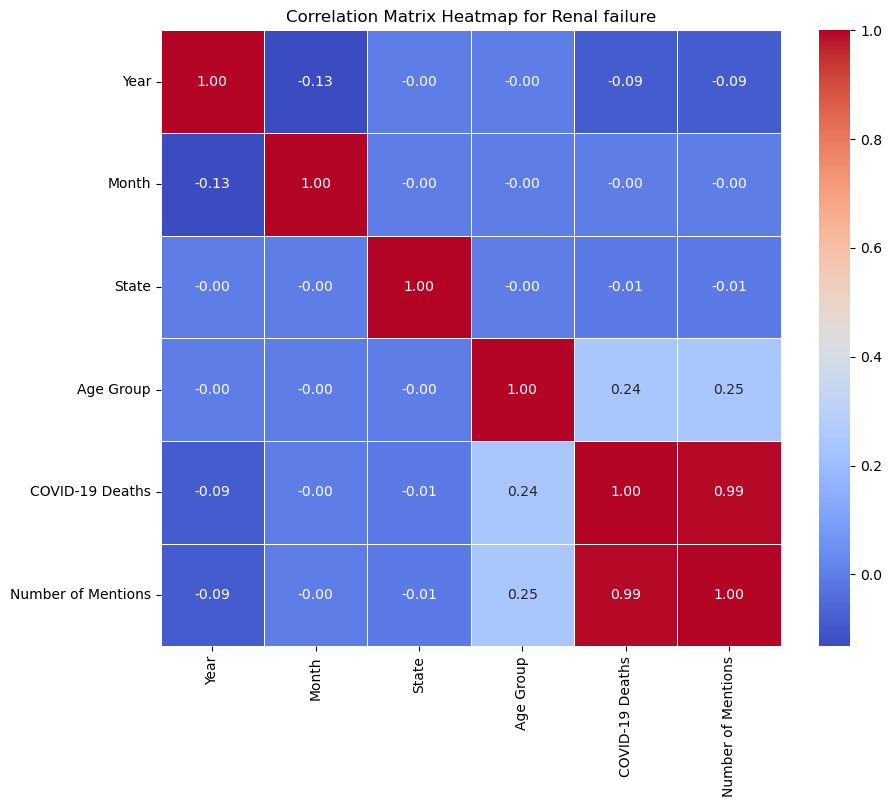

Correlation Matrix for Intentional and unintentional injury, poisoning, and other adverse events:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -4.578366e-02 -3.369931e-03 -1.452020e-02  2.959419e-01   
Number of Mentions -5.048902e-02 -1.155165e-02 -2.453668e-02  2.823599e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.045784           -0.050489  
Month                     -0.003370           -0.011552  
State                     -0.014520           -0.024537  
Age Group                  0.295942            0.282360  
COVID-19 Deaths            1.000000            0.876669  
Number

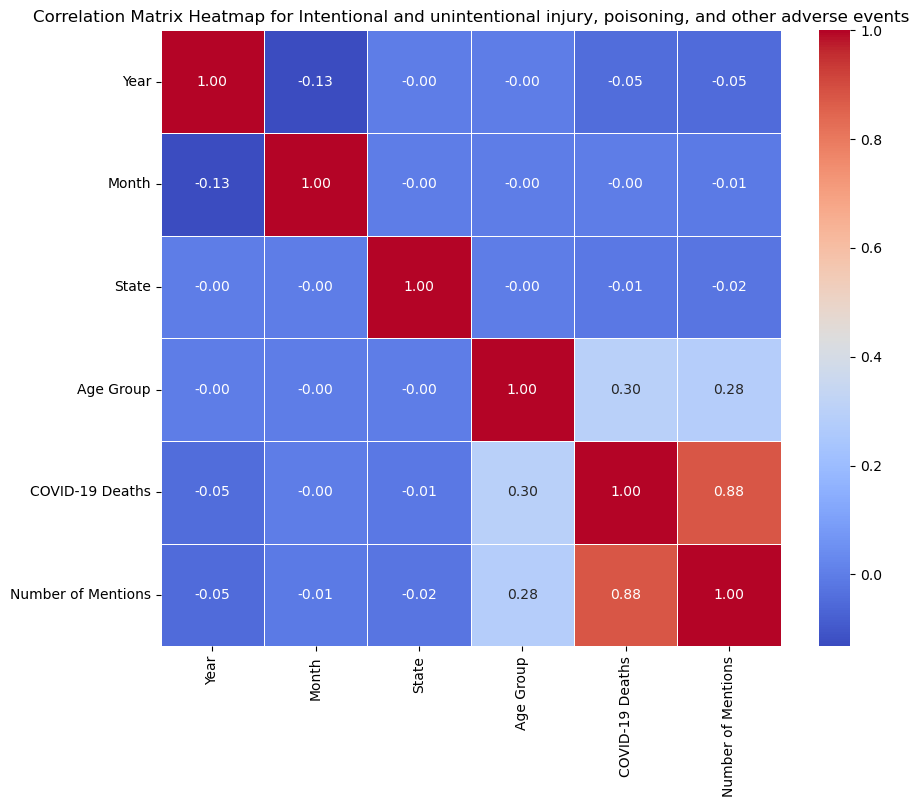

Correlation Matrix for All other conditions and causes (residual):
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.150798e-01  1.713598e-02 -7.381580e-03  2.976786e-01   
Number of Mentions -1.078379e-01  1.567837e-02  2.056520e-03  3.082163e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.115080           -0.107838  
Month                      0.017136            0.015678  
State                     -0.007382            0.002057  
Age Group                  0.297679            0.308216  
COVID-19 Deaths            1.000000            0.995454  
Number of Mentions         0.995454  

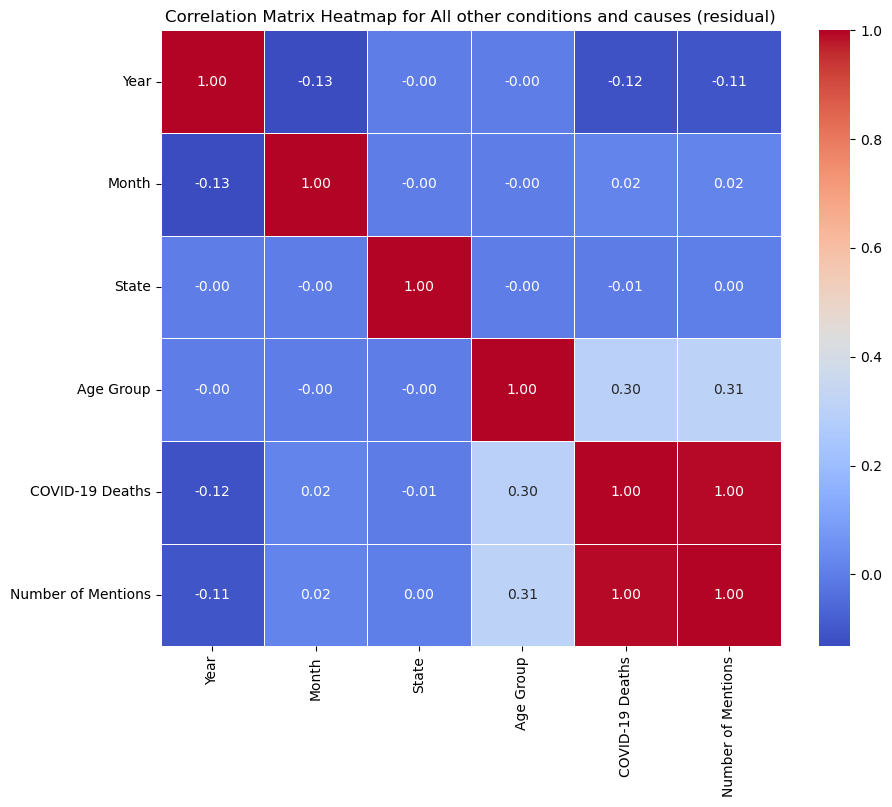

Correlation Matrix for COVID-19:
                             Year         Month         State     Age Group  \
Year                1.000000e+00 -1.322529e-01 -1.931483e-13 -1.777901e-14   
Month              -1.322529e-01  1.000000e+00 -7.373883e-15 -1.162213e-16   
State              -1.931483e-13 -7.373883e-15  1.000000e+00 -7.352989e-16   
Age Group          -1.777901e-14 -1.162213e-16 -7.352989e-16  1.000000e+00   
COVID-19 Deaths    -1.292597e-01  1.486729e-02 -2.070471e-02  2.685061e-01   
Number of Mentions -1.293516e-01  1.477807e-02 -2.067445e-02  2.684444e-01   

                    COVID-19 Deaths  Number of Mentions  
Year                      -0.129260           -0.129352  
Month                      0.014867            0.014778  
State                     -0.020705           -0.020674  
Age Group                  0.268506            0.268444  
COVID-19 Deaths            1.000000            0.999939  
Number of Mentions         0.999939            1.000000   



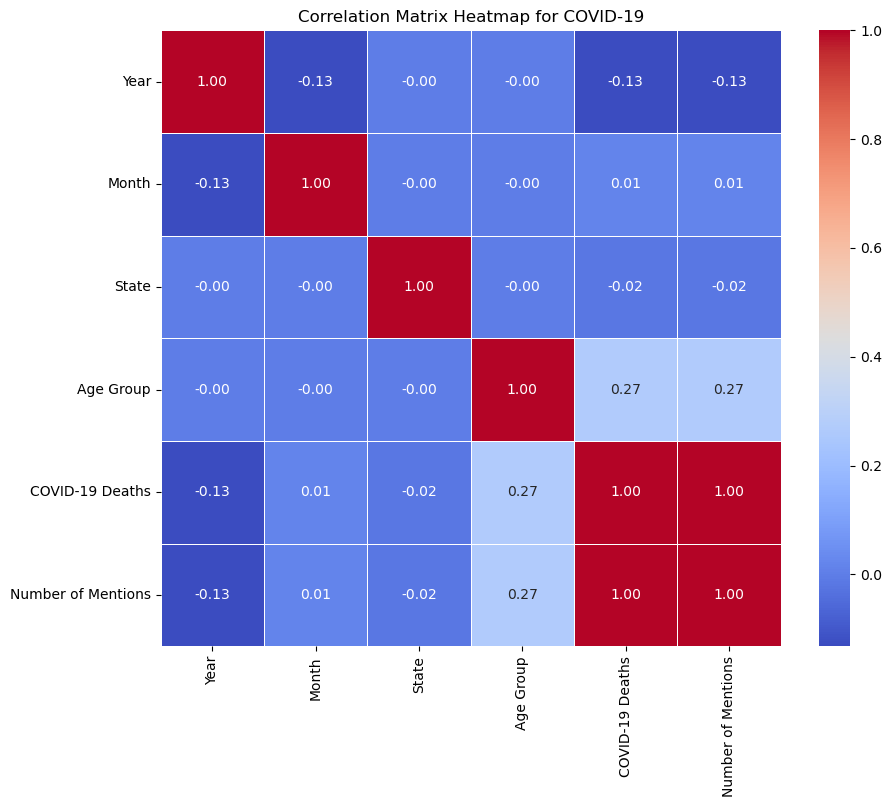

In [15]:
# Calculate the correlation for each condition and create a heatmap for each condition
for condition in conditions:
    df_condition = df_selected[df_selected['Condition'] == condition]
    df_condition_encoded = df_encoded[df_selected['Condition'] == condition]
    if df_condition_encoded.shape[0] > 1:
        numeric_df = df_condition_encoded.select_dtypes(include=[np.number])
        numeric_df = numeric_df.loc[:, numeric_df.var() != 0.0]
        corr_matrix = numeric_df.corr()


        # Print a correlation matrix for each unique condition
        print(f'Correlation Matrix for {condition}:\n', corr_matrix, '\n')

        # Create a heatmap for each unique condition
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title(f'Correlation Matrix Heatmap for {condition}')
        heatmap_condition = plt.gcf()
        plt.show()

In [16]:
# Export condition heatmaps
heatmap_condition.savefig(os.path.join(path, '04 Analysis', 'Visualizations', f'heatmap_corr_matrix_{condition.replace(" ", "_").lower()}.png'))

Based on the heatmaps and correlation matrixes, the top positive correlation for the follow conditions: Influenza and pneumonia, Vascular and unspecific dementia, Diabetes, Cardiac arrest, Ischemic heart disease, Renal failure, adult respiratory distress syndrome, cardiac arrthythmia, heart failure, and cerebrovascular disease is  is COVID-19 Deaths and Numbers of Mentions.

The following conditions had the same top negative correlation of COVID-19 Deaths and Year: Adult respiratory distress syndrome, obesity, COVID-19, diabetes, influenza and pneumonia, renal failure, cerebrovascular disease, Alzheimer's disease, cardiac arrthythmia, other diseases of the circulatory system.

### Insights from correlations

There is a very strong positive correlation between specific medical conditions and COVID-19 deaths, especially with the Number of mentions. Some conditions like influenza and pneumonia, diabetes, and vascular and unspecified dementia have 0.99 correlations or higher which indicates that mentions of these conditions are reliable in calculating the impact of COVID-19 deaths. We can also see moderate correlations between age group and certain medical conditions such as cerebrovascular diseases which illustrate the increased risk of older populations. The weak correlation between COVID-19 deaths and Year can be used to illustrate a decrease in the impact COVID-19 has over time, which could be attributed to increased information and better treatment options becoming available.

## 4. Create scatterplots

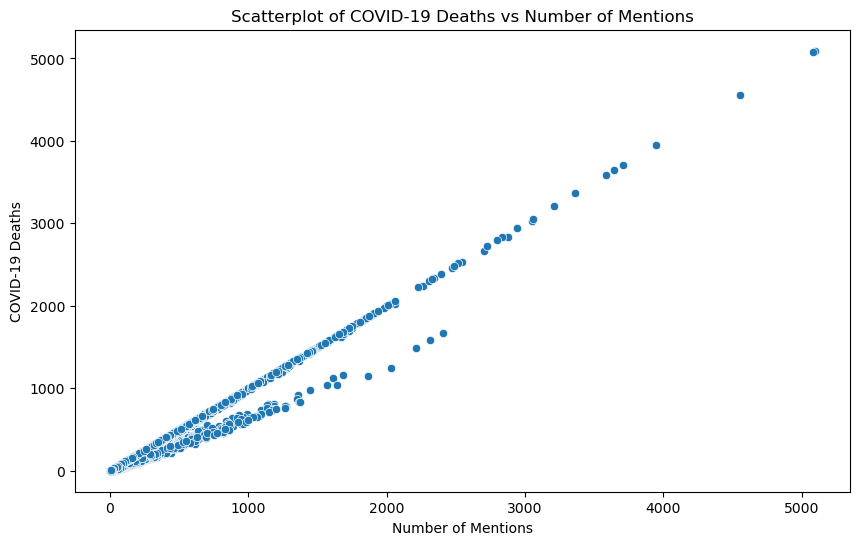

In [17]:
# Scatterplot for COVID-19 Deaths and Number of Mentions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='Number of Mentions', y='COVID-19 Deaths')
plt.title('Scatterplot of COVID-19 Deaths vs Number of Mentions')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_mentions_deaths = plt.gcf()
plt.show()

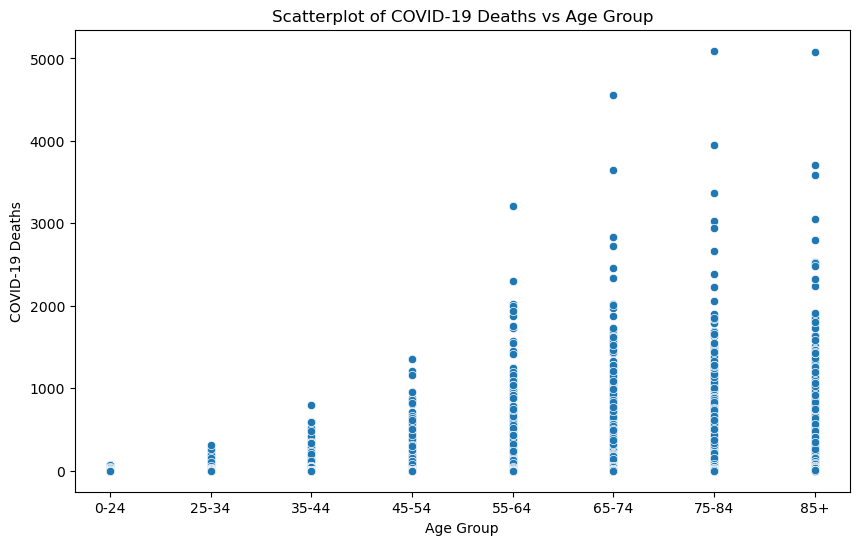

In [18]:
# Scatterplot for Age Group and COVID-19 Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='Age Group', y='COVID-19 Deaths')
plt.title('Scatterplot of COVID-19 Deaths vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('COVID-19 Deaths')
scatterplot_agegroup_deaths = plt.gcf()
plt.show()

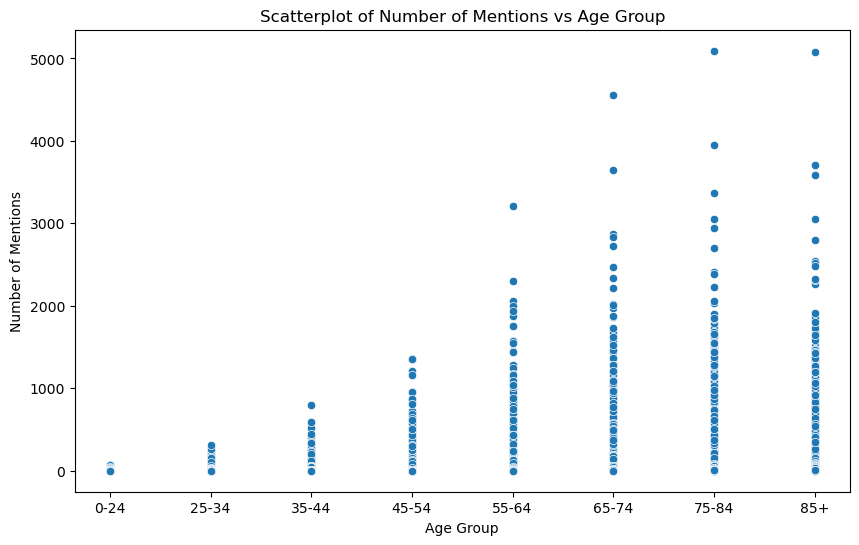

In [43]:
# Scatterplot for Age Group and Number of Mentions
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='Age Group', y='Number of Mentions')
plt.title('Scatterplot of Number of Mentions vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Mentions')
scatterplot_mentions_agegroup = plt.gcf()
plt.show()

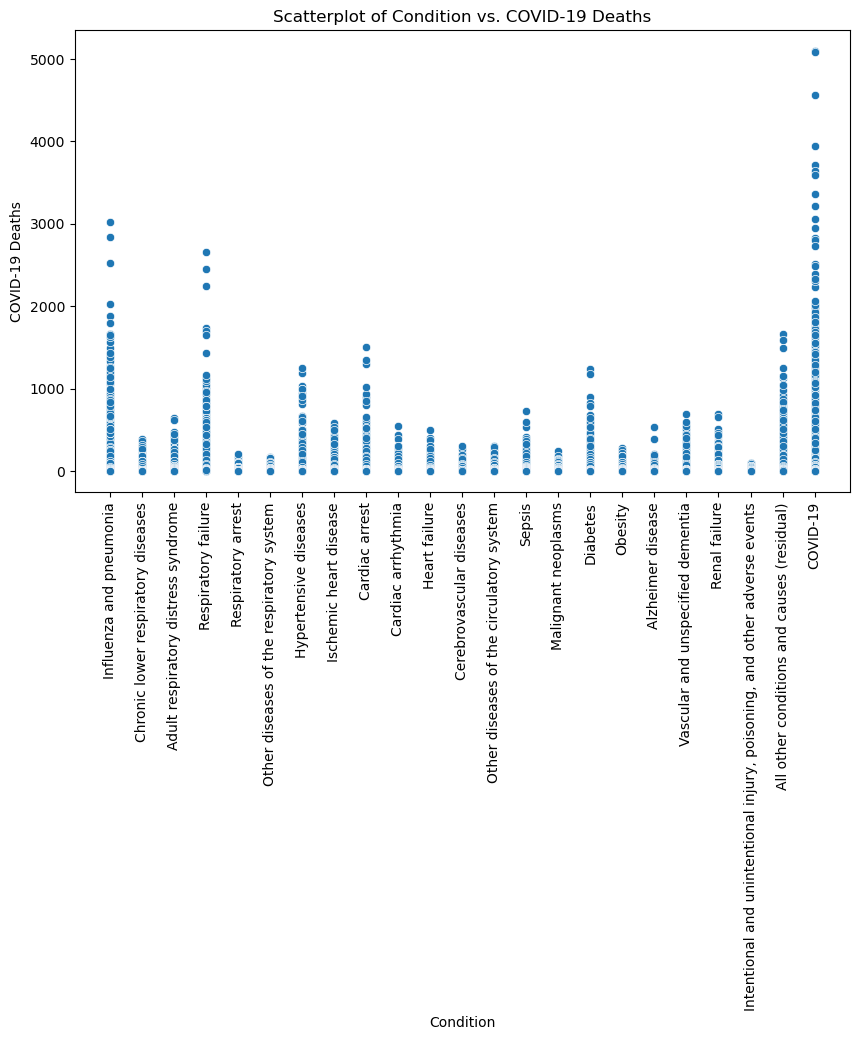

In [44]:
# Scatterplot for Condtion and COVID-19 Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='Condition', y='COVID-19 Deaths')
plt.title('Scatterplot of Condition vs. COVID-19 Deaths')
plt.xlabel('Condition')
plt.ylabel('COVID-19 Deaths')
plt.xticks(rotation=90)
scatterplot_condition_deaths = plt.gcf()
plt.show()

### Scatterplots of Top 5 positive correlations by Condition

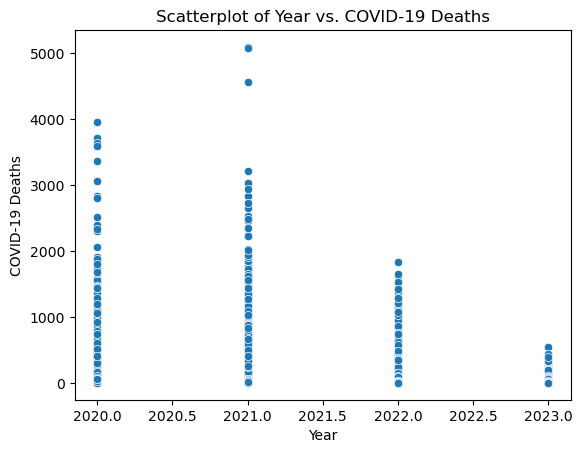

In [20]:
# Scatterplot for Year and COVID-19 Deaths
sns.scatterplot(data=df_selected, x='Year', y='COVID-19 Deaths')
plt.title('Scatterplot of Year vs. COVID-19 Deaths')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_year_deaths = plt.gcf()
plt.show()

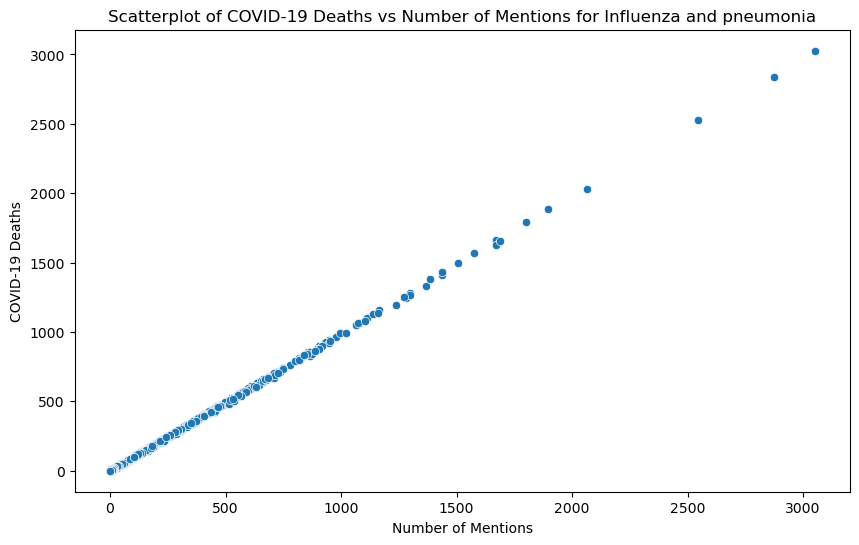

In [21]:
# Scatterplot for Influenza and pneumonia
condition = 'Influenza and pneumonia'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_influenza_pneumonia = plt.gcf()
plt.show()

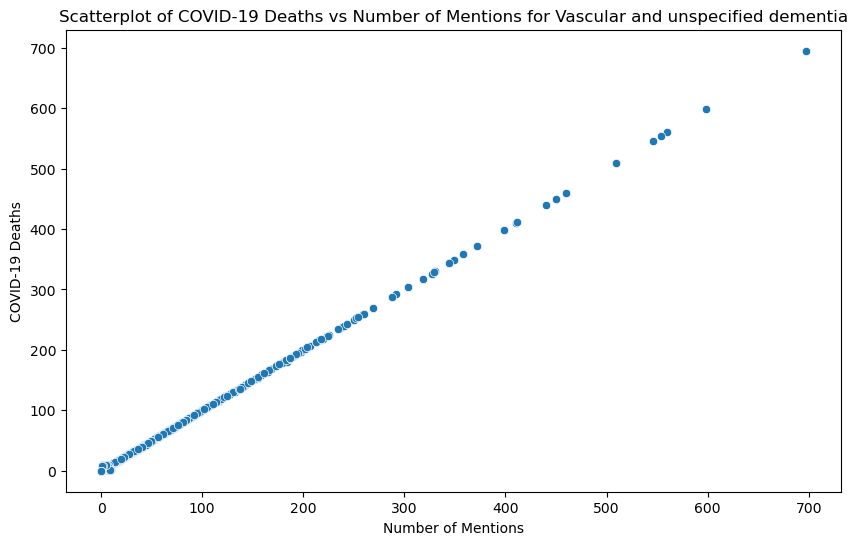

In [22]:
# Scatterplot for Vascular and unspecified dementia
condition = 'Vascular and unspecified dementia'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_vascular_dementia = plt.gcf()
plt.show()

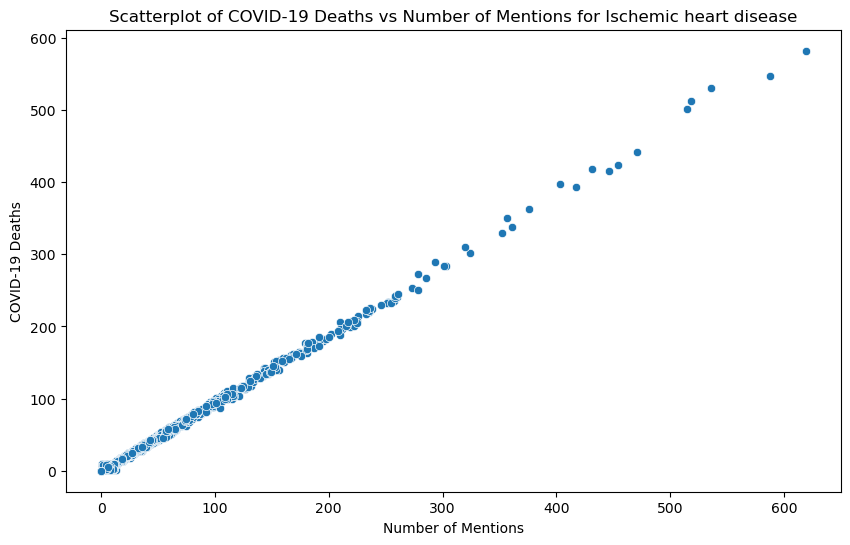

In [23]:
# Scatterplot for Ischemic heart disease
condition = 'Ischemic heart disease'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_ischemic_heart_disease = plt.gcf()
plt.show()

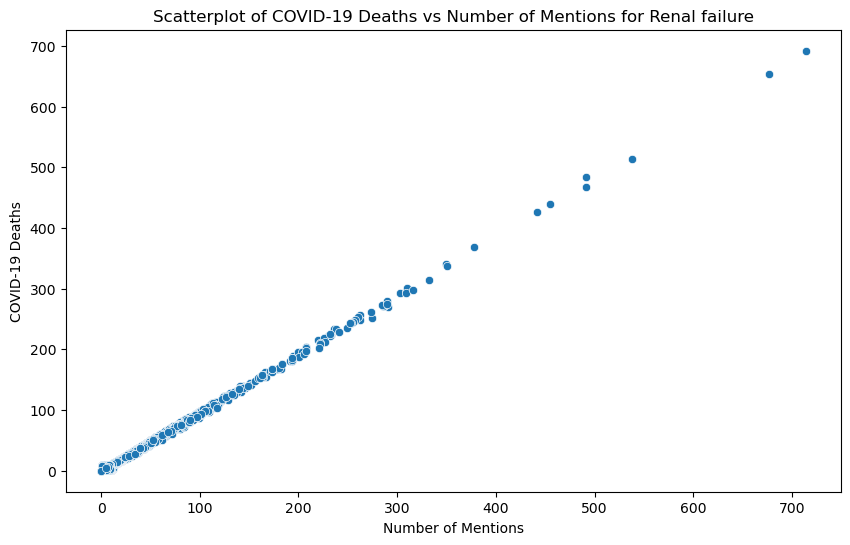

In [24]:
# Scatterplot for Renal failure
condition = 'Renal failure'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_renal_failure = plt.gcf()
plt.show()

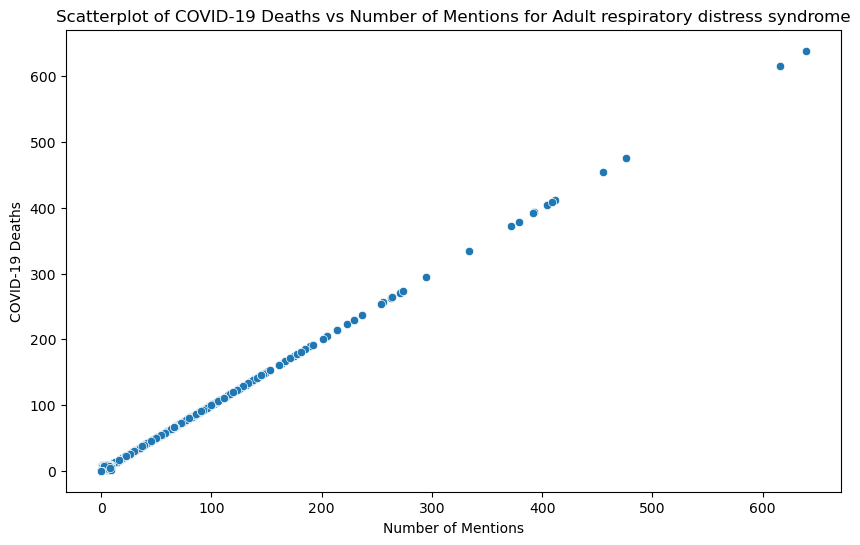

In [25]:
# Scatterplot for Adult respiratory distress syndrome
condition = 'Adult respiratory distress syndrome'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Number of Mentions', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Number of Mentions for {condition}')
plt.xlabel('Number of Mentions')
plt.ylabel('COVID-19 Deaths')
scatterplot_respiratory_distress = plt.gcf()
plt.show()

### Scatterplots of Top 5 Negative correlations by Condition

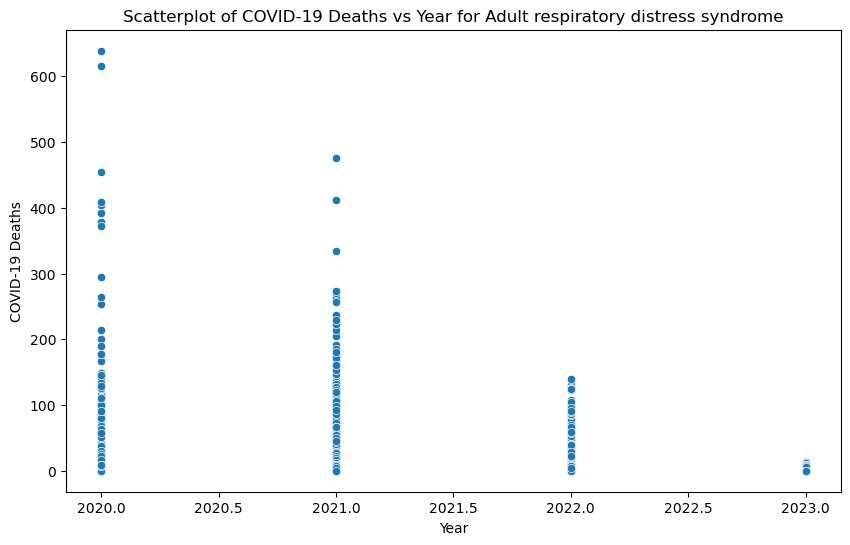

In [26]:
# Scatterplot for Adult respiratory distress syndrome - COVID-19 Deaths and Year
condition = 'Adult respiratory distress syndrome'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_respiratory_distress_year = plt.gcf()
plt.show()

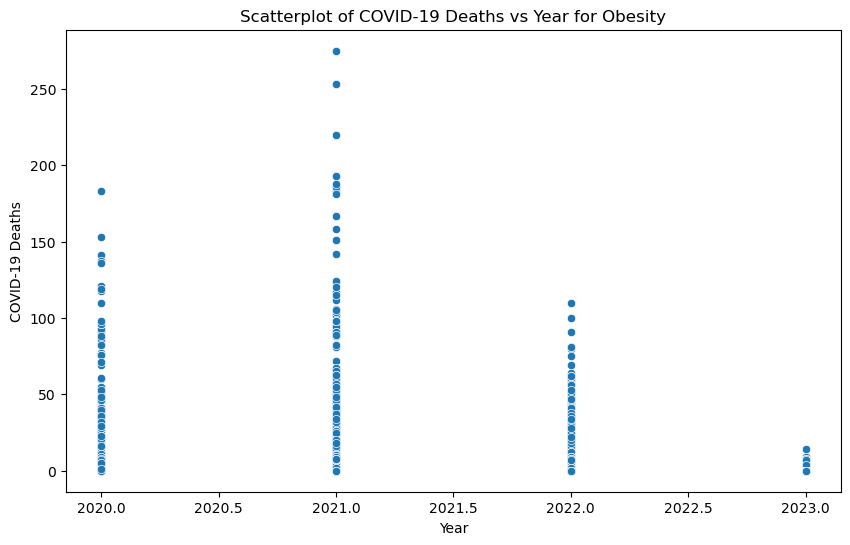

In [27]:
# Scatterplot for Obesity - COVID-19 Deaths and Year
condition = 'Obesity'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_obesity_year = plt.gcf()
plt.show()

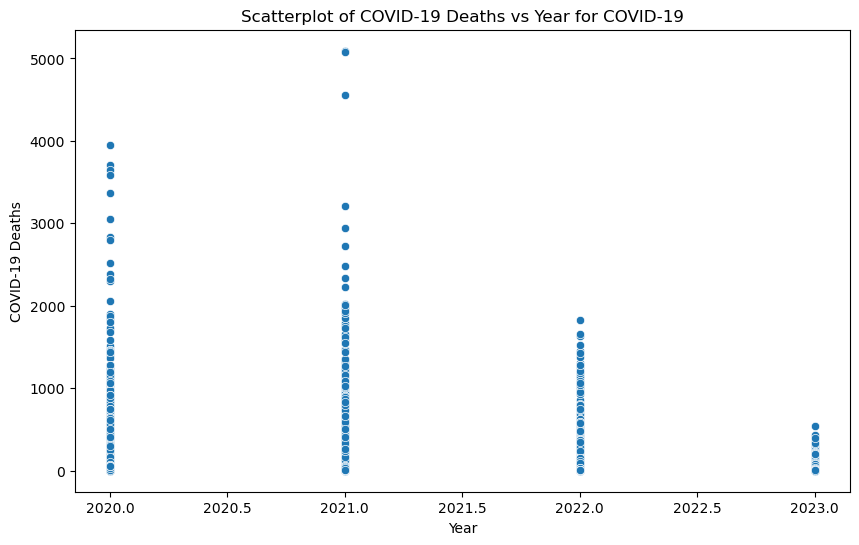

In [28]:
# Scatterplot for COVID-19 - COVID-19 Deaths and Year
condition = 'COVID-19'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_covid19_year = plt.gcf()
plt.show()

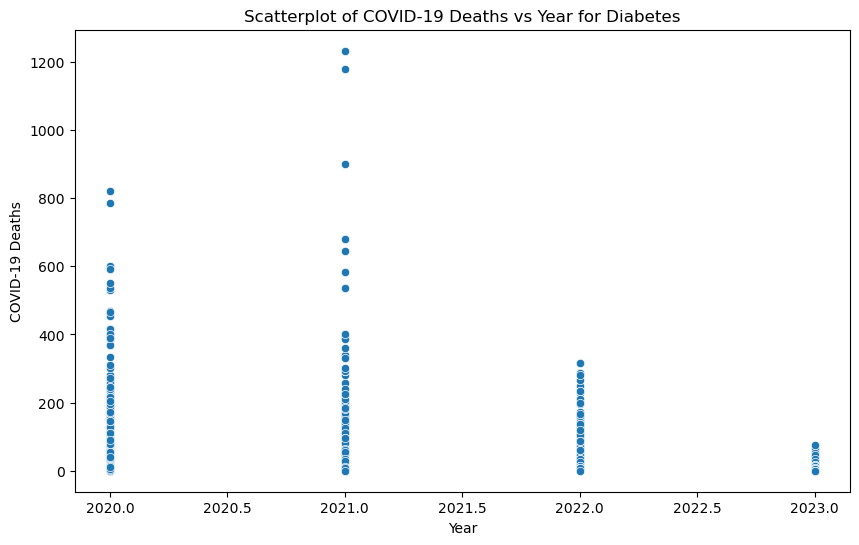

In [29]:
# Scatterplot for Diabetes - COVID-19 Deaths and Year
condition = 'Diabetes'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_diabetes_year = plt.gcf()
plt.show()

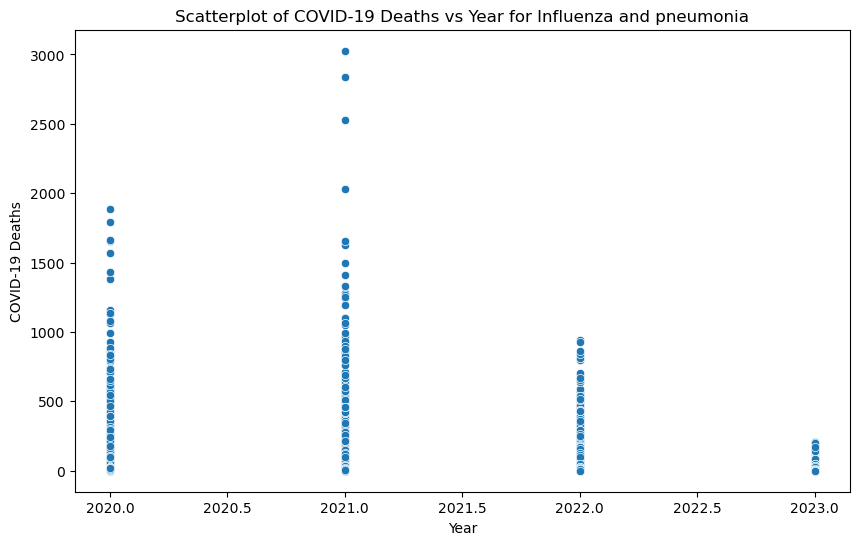

In [30]:
# Scatterplot for Influenza and pneumonia - COVID-19 Deaths and Year
condition = 'Influenza and pneumonia'
df_condition = df_selected[df_selected['Condition'] == condition]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_condition, x='Year', y='COVID-19 Deaths')
plt.title(f'Scatterplot of COVID-19 Deaths vs Year for {condition}')
plt.xlabel('Year')
plt.ylabel('COVID-19 Deaths')
scatterplot_influenza_year = plt.gcf()
plt.show()

### Insights from analyzing scatterplots

Reviewing the Age Group scatterplots illustrates a clear trend between older populations and higher death counts due to COVID-19. The COVID-19 over Year scatterplot shows variability with a slight downward trend over time, which could reflect new data, treatment options, and public health initiatives which can decrease the spread and mortality of COVID-19. WHen looking at the plots of the specific conditions, we see strong positive correlation between COVID-19 deaths and conditions like influenza and pneumonia, dementia both vascular and unspecified, and heart disease which means that higher mentions of these conditions are associated with higher deaths due to COVID-19. Age groups and conditions such as renal failure or cardiac arrest illustrate that older populations are more vulnerable to these conditions and patients with these comorbid conditions have higher death rates due to COVID-19. 

## 5. Pair plots

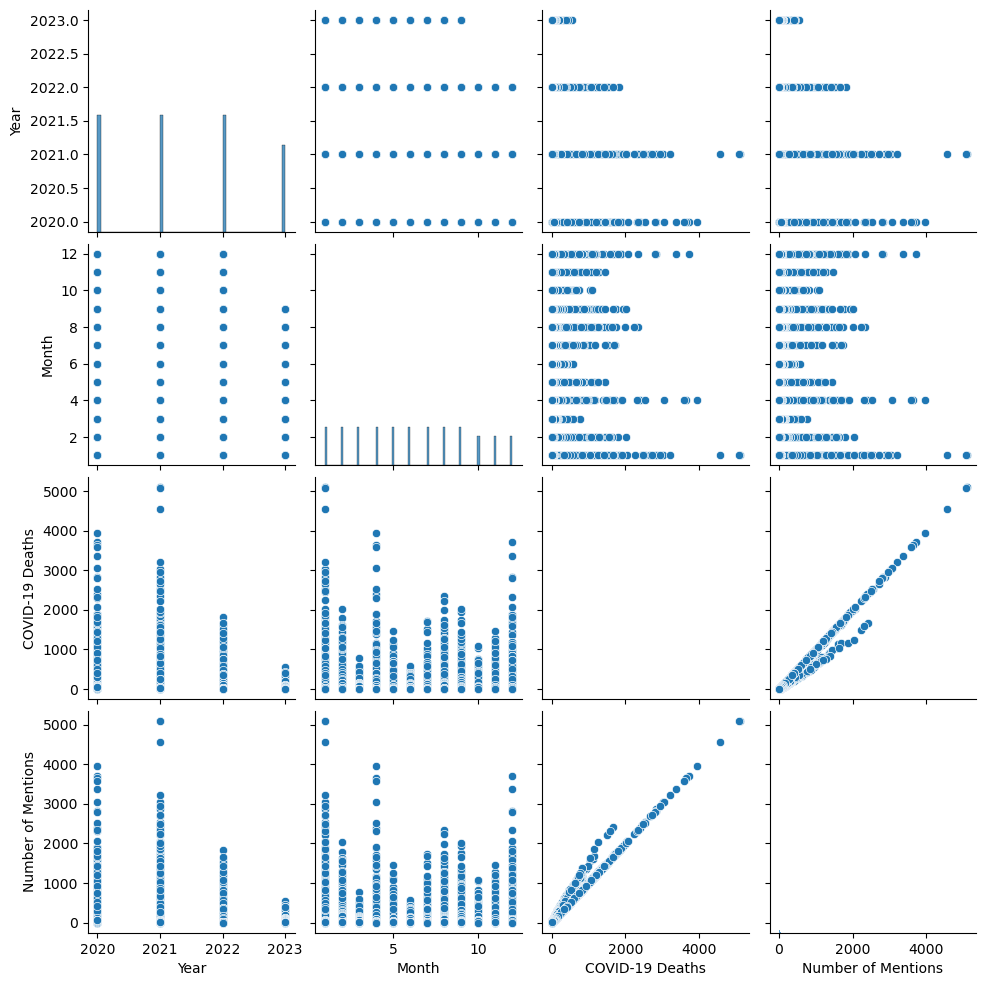

In [31]:
# Create a Pair Plot of the entire dataset
sns.pairplot(df_covid_19)
pair_plot_entire_dataset = plt.gcf()
plt.show()

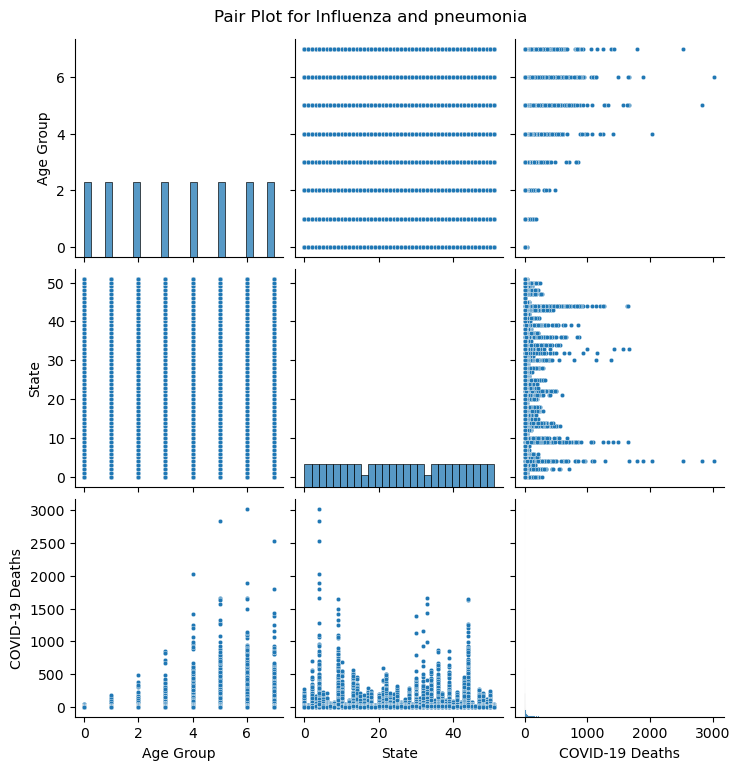

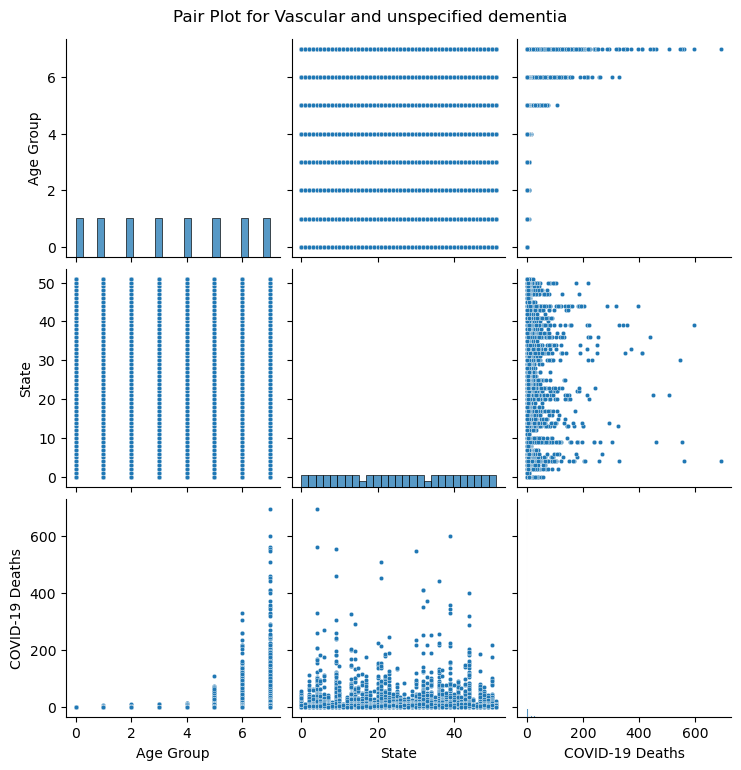

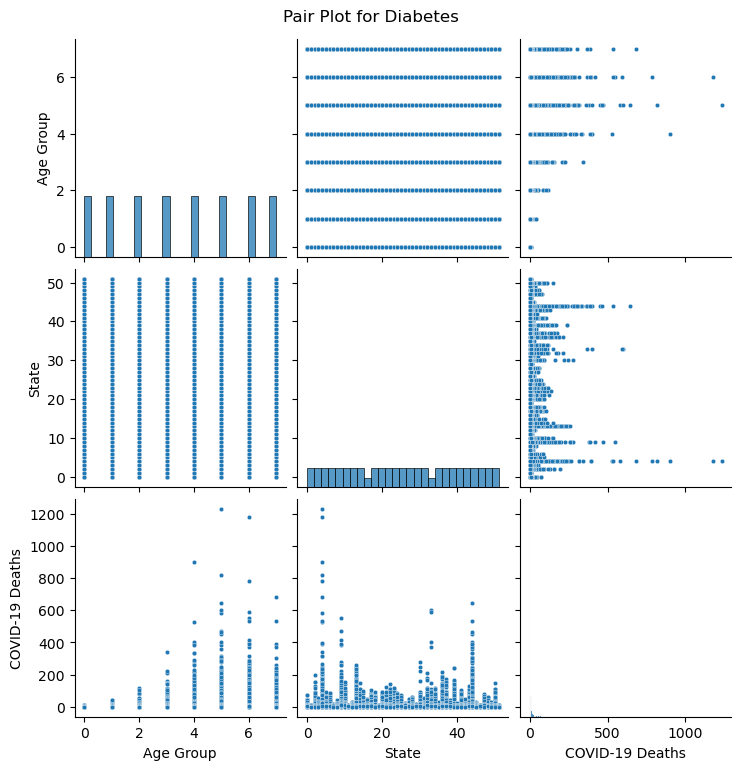

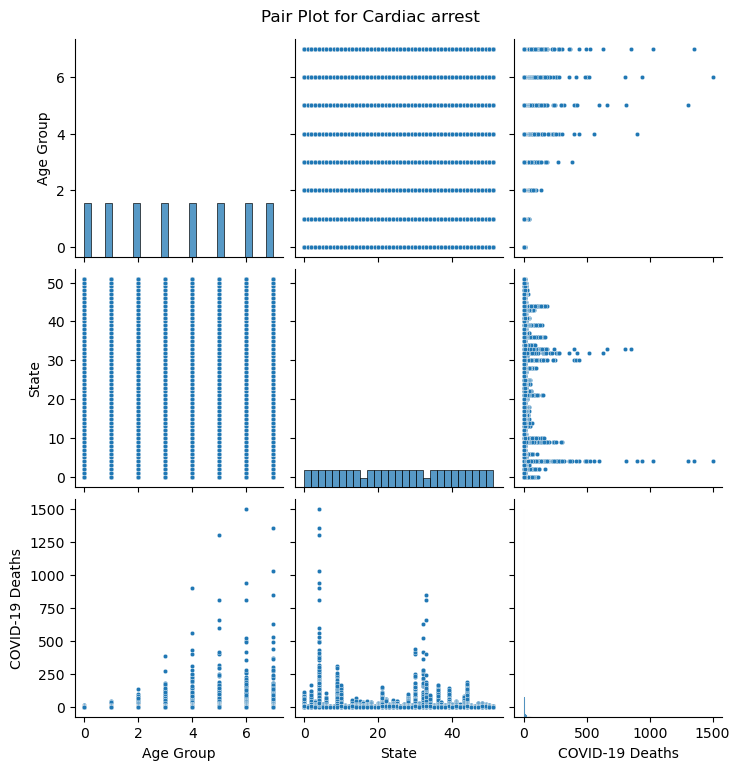

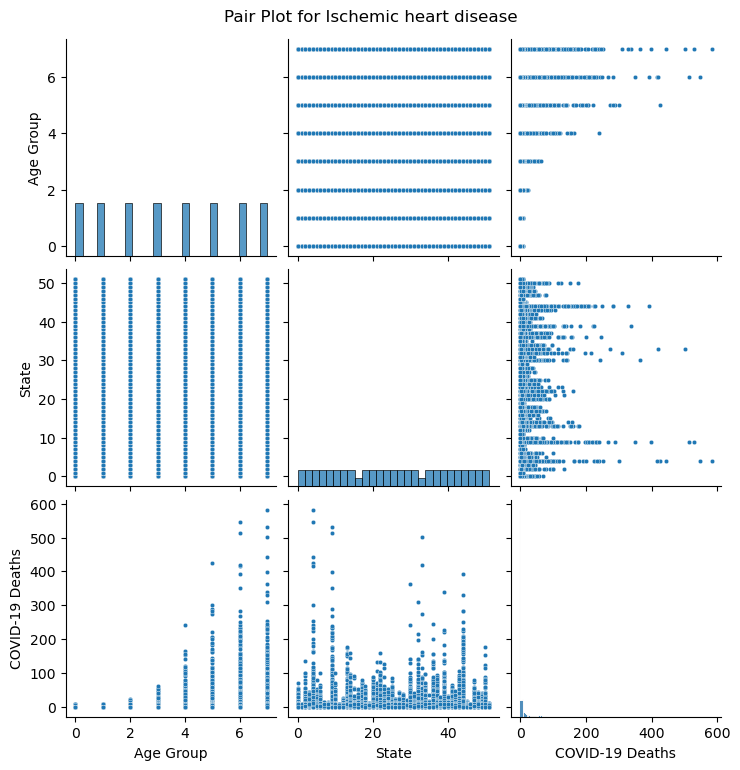

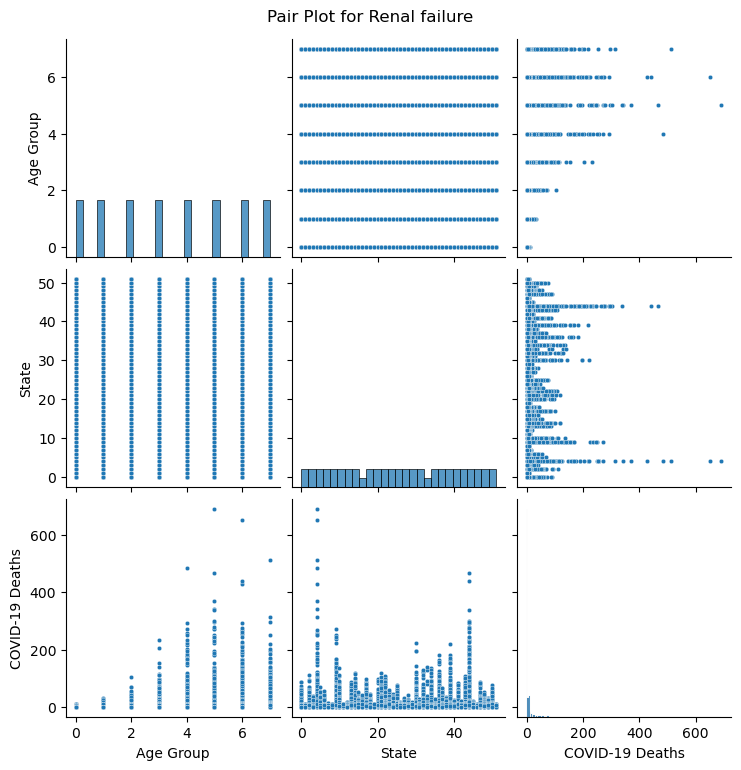

In [33]:
# Create Pair plots for specific conditions
pair_plot_columns = ['Age Group', 'State', 'COVID-19 Deaths']

# Filter the dataframe for the selected conditions
conditions_for_pair_plot = ['Influenza and pneumonia', 'Vascular and unspecified dementia', 'Diabetes', 'Cardiac arrest', 'Ischemic heart disease', 'Renal failure']
df_pair_plot_conditions = df_selected[df_selected['Condition'].isin(conditions_for_pair_plot)]

# Encode categorical variables for the pair plot within this section
df_pair_plot_encoded = df_pair_plot_conditions.copy()
df_pair_plot_encoded['State'] = df_pair_plot_encoded['State'].astype('category').cat.codes
df_pair_plot_encoded['Age Group'] = df_pair_plot_encoded['Age Group'].astype('category').cat.codes

# Use a for loop to create separate pair plots for each condition
for condition in conditions_for_pair_plot:
    df_condition = df_pair_plot_encoded[df_pair_plot_encoded['Condition'] == condition]
    g = sns.pairplot(df_condition[pair_plot_columns], plot_kws={'s': 10})
    plt.suptitle(f'Pair Plot for {condition}', y=1.02)
    pair_plot_condition = plt.gcf()
    plt.show()
    
    # Export the pair plot
    pair_plot_condition.savefig(os.path.join(path, '04 Analysis', 'Visualizations', f'pair_plot_condition{condition.replace(" ", "_").lower()}.png'))

### Insights from Pair Plots

Some insights we can glean from the pair plots are that COVID-19 deaths have significant variation across the different conditions/disease states. When looking at age groups, we can see that the older age groups frequently have more documented deaths due to COVID-19. This is illustrated when we examine the relationship between age groups and COVID-19 deaths. COVID-19 deaths also vary greatly depending on the comorbid condition present. 

Some questions that require more invesigation are: is there a correlation between State and COVID-19 deaths? Do different regions of the country have differing rates of COVID-19 deaths? Are there certain medical conditions that have a greater impact on the older populations versus the younger? Which conditions would be considered high-risk for COVID-19 deaths and thus require more medical intervention?

## 6. Create categtorical plots

<Figure size 1200x800 with 0 Axes>

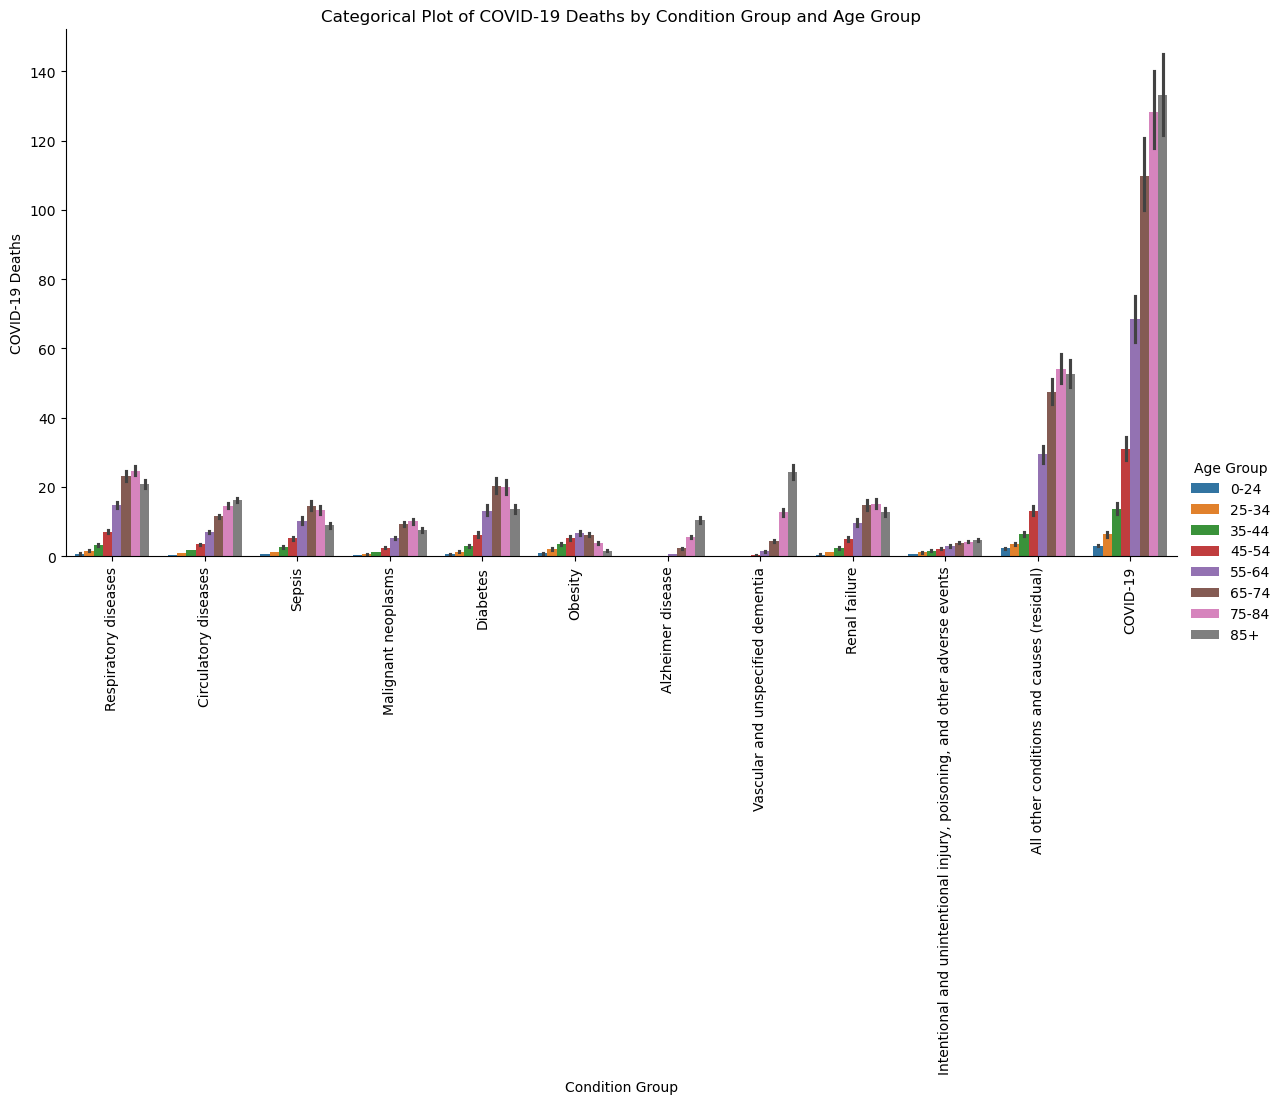

In [34]:
# Create a categorical plot for COVID-19 Deaths by Condition Group and Age Group
plt.figure(figsize=(12, 8))
sns.catplot(x='Condition Group', y='COVID-19 Deaths', hue='Age Group', data=df_selected, kind='bar', height=6, aspect=2)
plt.title('Categorical Plot of COVID-19 Deaths by Condition Group and Age Group')
plt.xticks(rotation=90)
catplot_conditiongroup_agegroup_deaths = plt.gcf()
plt.show()

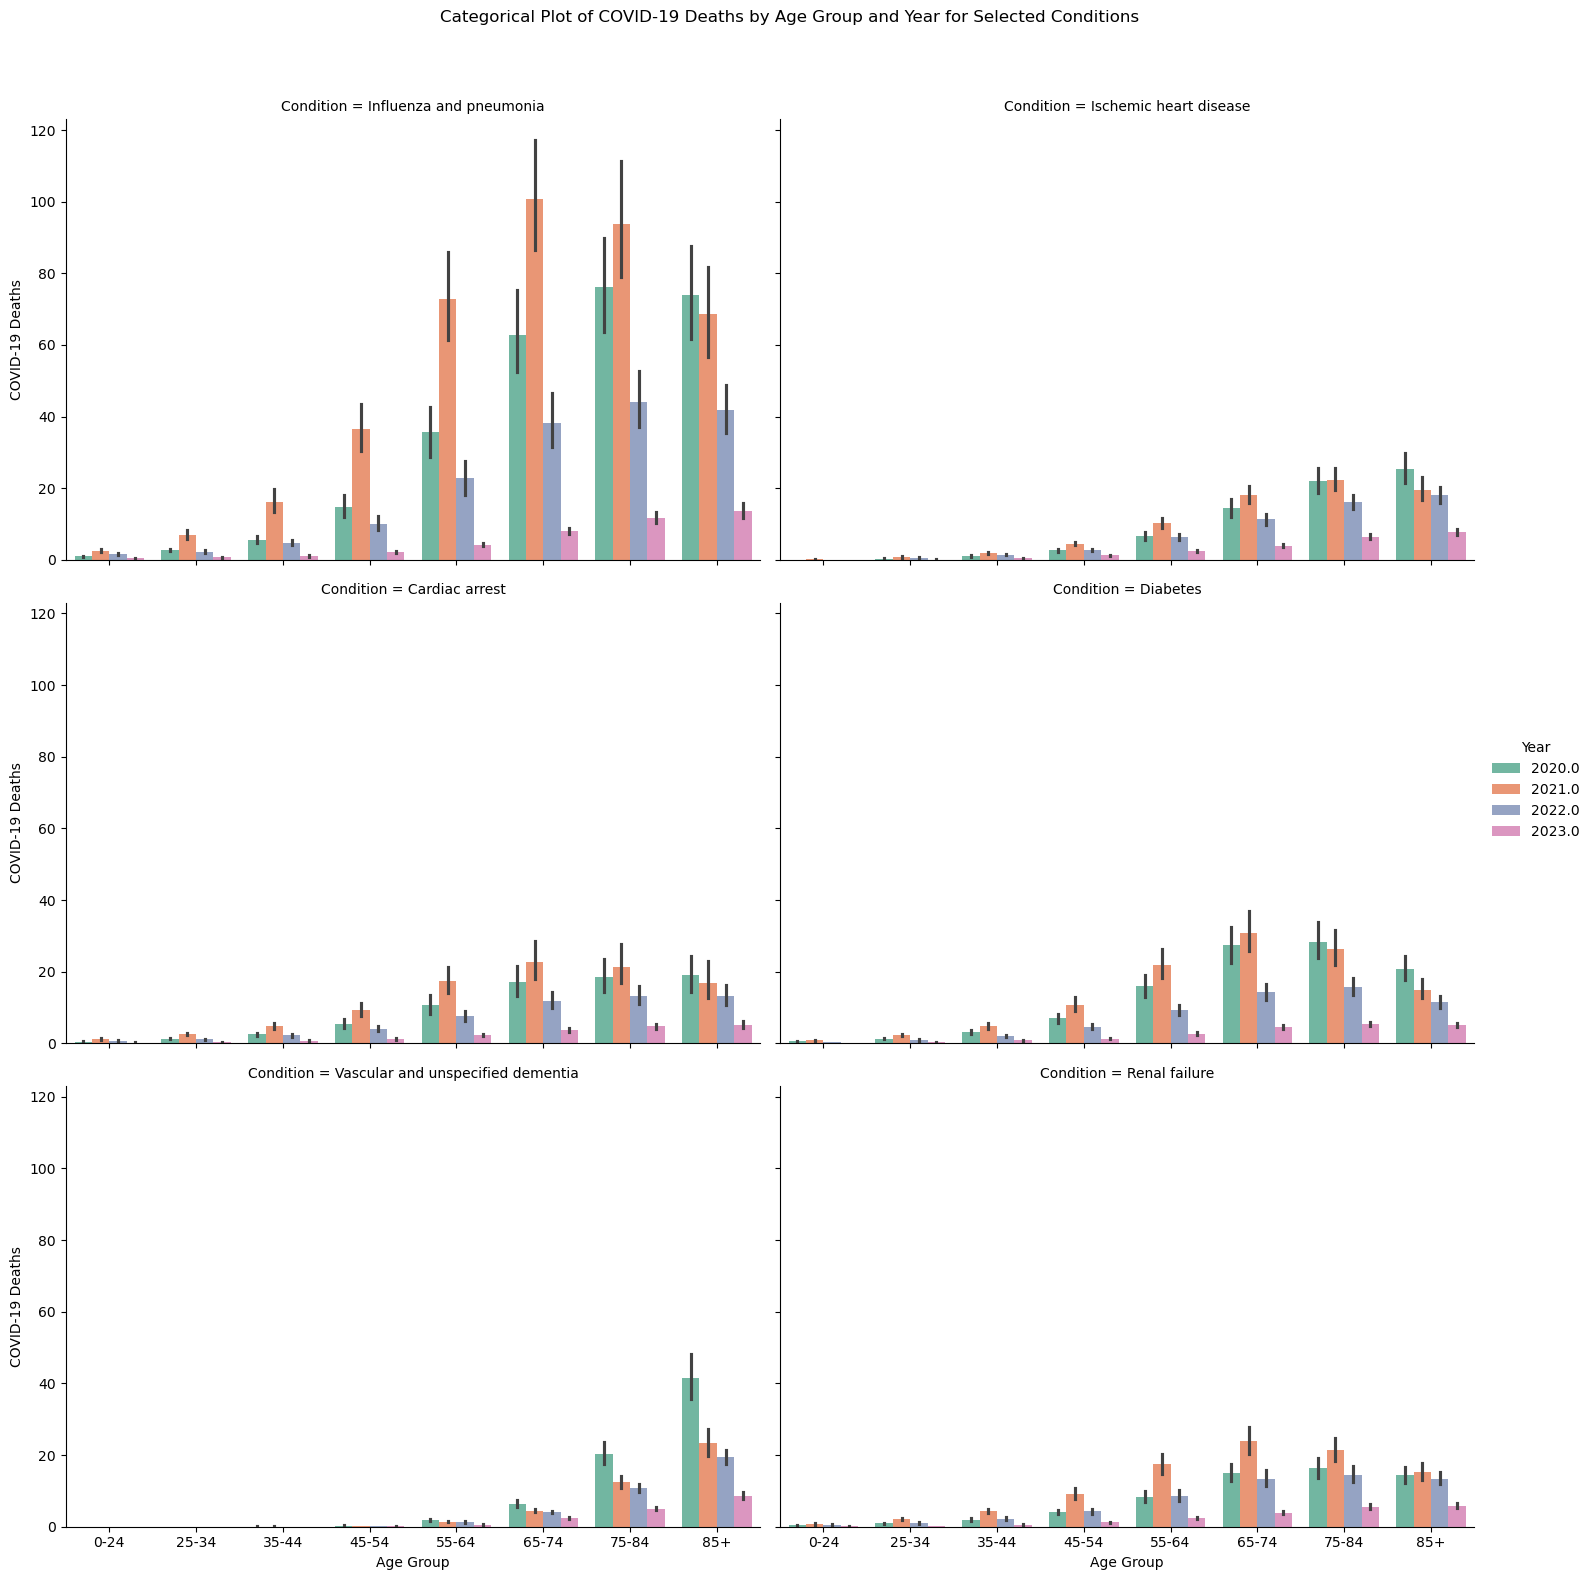

In [35]:
# Create a categorical plot based on the top 6 conditions with positive correlation for increased COVID-19 deaths

# Select columns and conditions for the plot
categorical_columns = ['Year', 'Age Group', 'COVID-19 Deaths']
conditions_for_categorical_plot = ['Influenza and pneumonia', 'Vascular and unspecified dementia', 'Diabetes', 'Cardiac arrest', 'Ischemic heart disease', 'Renal failure']
df_categorical_conditions = df_selected[df_selected['Condition'].isin(conditions_for_categorical_plot)]

# Create a categorical plot
g = sns.catplot(
    x='Age Group', 
    y='COVID-19 Deaths', 
    hue='Year', 
    col='Condition', 
    col_wrap=2,
    data=df_categorical_conditions, 
    kind='bar', 
    height=5,
    aspect=1.5,
    palette='Set2')
g.fig.suptitle('Categorical Plot of COVID-19 Deaths by Age Group and Year for Selected Conditions', y=1.05)
catplot_selected_conditions = plt.gcf()
plt.show()


### Insights from the categorical plots

Looking at the categorical plots, we can see significantly higher deaths due to COVID-19 in certain comorbid conditions such as influenza and pneumonia and cardiovascular disease (cardiac arrest and ischemic heart disease) across all age groups which highlights the severity of the risk of death due to COVID-19 patients with these conditions face. Older age groups consistently show higher rates of mortality due to COVID-19 across the comorbid conditions further illustrating that these vulnerable patients have more severe outcomes from COVID-19, especially if they have one or more of these conditions. When we review the specific conditions over time, we find there is variability with a downward trend in COVID-19 deaths which may be attributed to new treatment options including medications and vaccines, new and improved research into COVID-19 transmission and mechanism of action, and public health initiatives such as masking, handwashing, and free vaccination clinics.

## 7. Revisiting our questions

**Q. Which conditions are the most common contributing factors to Covid-19 deaths?**

A. Reviewing the categorical plots, influenza and pneumonia, cardiac arrest, and ischemic heart disease are the most common comorbid conditions that contribute to COVID-19 deaths.

**Q. Do the contributing conditions differ by age group?**

A. There is a definite trend of older age groups having an increased number of deaths due to COVID-19 in almost all comorbid conditions; especially diabetes, vascular and unspecified dementia, anad renal failure.

**Q. Are there regional patterns with contributing conditions associated with Covid-19 deaths across the U.S.?**

A. Further analysis required to answer.

**Q. What are the highest and lowest prevalence of conditions contributing to Covid-19 deaths among the states?**

A. Further analysis is required to answer.

**Q. How have contributing conditions and Covid-19 deaths changed over time?**

A. Analyzing the scatterplots, shows a slight downward trend in COVID-19 deaths over time for the specific conditions. We might be able to get more meaningful data investigating the number of mentions for specific conditions and Covid-19 deaths instead.

**Q. Are there any trends or seasonality associated with deaths due to Covid-19 or any contributing conditions?**

A. Further analysis is required to answer.

**Q. Is there the possibility to create a predictive model to identify high-risk populations based on contributing conditions, geography, and demographics?**

A. Given that there are strong correlations between Covid-19 deaths and number of mentions, conditions, condition groups, and age groups it is likely that a predictive model can be created to identify high risk populations based on comorbid conditions, demographics, and geography.


## 8. Defining potential hypotheses

### Hypothesis: Rates of COVID-19 deaths will be significantly higher in older age groups compared to younger age groups with the same comorbid conditions.

Reviewing the scatterplots and pair plots have consistently shown that older age groups have higher rates of death depending on comorbid conditions which confirms and reinforces age as risk factor for mortality due to COVID-19.This hypothesis is also supported when we look at age groups and COVID-19 deaths, we see a moderate to strong positive correlation.

### Hypothesis: If someone has a high-risk condition such as influenza and pneumonia, vascular and unspecified dementia, ischemic heart disease, renal failure or diabetes, they will have a higher rate of mortality due to COVID-19 compared to people with other comorbid conditions.

There are strong positive correlations between COVID-19 deaths and the specific conditions listed above which supports the hypothesis that patients with these conditions are at higher risk of death from COVID-19.

### Hypothesis: The higher the number of mentions of a particular condition, the higher the mortality rate due to COVID-19 for patients with those conditions.

There is an extremely strong correlation (0.99) between number of mentions and COVID-19 deaths across multiple conditions which can support the idea that mentions are a reliable indicator of the impact and severity of COVID-19 on those conditions.

## 9. Export Visualizations created

In [38]:
# Export heatmaps
heatmap_corr_matrix.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap_corr_matrix.png'))

In [45]:
# Export Scatterplots
scatterplot_mentions_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_mentions_deaths.png'))

scatterplot_agegroup_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_agegroup_deaths.png'))

scatterplot_mentions_agegroup.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_mentions_agegroup.png'))

scatterplot_condition_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_condition_deaths.png'))

scatterplot_year_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_year_deaths.png'))

scatterplot_influenza_pneumonia.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_influenza_pneumonia.png'))

scatterplot_vascular_dementia.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_vascular_dementia.png'))

scatterplot_ischemic_heart_disease.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_ischemic_heart_disease.png'))

scatterplot_renal_failure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_renal_failure.png'))

scatterplot_respiratory_distress.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_respiratory_distress.png'))

scatterplot_respiratory_distress_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_respiratory_distress_year.png'))

scatterplot_obesity_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_obesity_year.png'))

scatterplot_covid19_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_covid19_year.png'))

scatterplot_diabetes_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_diabetes_year.png'))

scatterplot_influenza_year.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_influenza_year.png'))

In [40]:
# Export Pair Plots
pair_plot_entire_dataset.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pair_plot_entire_dataset.png'))

In [41]:
# Export Categorical Plots
catplot_conditiongroup_agegroup_deaths.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_conditiongroup_agegroup_deaths.png'))

catplot_selected_conditions.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_selected_conditions.png'))